<a href="https://colab.research.google.com/github/meenubenny/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/Meenu_Benny_Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato_Restaurant_Clustering_&_Sentiment_Analysis**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Meenu Benny
##### **Team Member 2 -** - T. Ompriya Subudhi



# **Project Summary -**

This project used advanced data analytics techniques to gain a deeper understanding of restaurants and customer feedback on the popular online meal delivery platform, Zomato.

Data obtained included information such as the restaurant name, location, dishes, average cost for two people, ratings, and user reviews.

I then began data cleaning and pre-processing, eliminating duplicate entries, correcting missing values, and converting the data into a format suitable for analysis.

The next step in the project was to perform clustering of the restaurant data using the k-means algorithm. The goal of clustering was to group similar restaurants together and identify patterns in the data. The characteristics used for clustering included restaurant location, cuisines, and average cost for two people. The number of clusters was determined using the elbow method.

I then conducted a sentiment analysis of the user ratings to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were used to classify the reviews as positive, negative, or neutral. I also extracted the most frequently occurring words in the reviews and visualized them by creating word clouds.

The result of the analysis showed that the restaurants in the city were classified into five groups based on location, cuisine, and average price for two people. The sentiment analysis showed that customers generally had a positive attitude towards the restaurants.

In summary, this project is an example of the usefulness of clustering and sentiment analysis to gain a deeper understanding of restaurant data on Zomato. The insights gained from the analysis can be of great use to both restaurants and customers to make informed decisions. In addition, the project can be extended to other cities or even countries to gain insights into the eating habits and preferences of people in different regions.

# **GitHub Link -**

https://github.com/meenubenny/Zomato_Restaurant_Clustering_and_Sentiment_Analysis

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

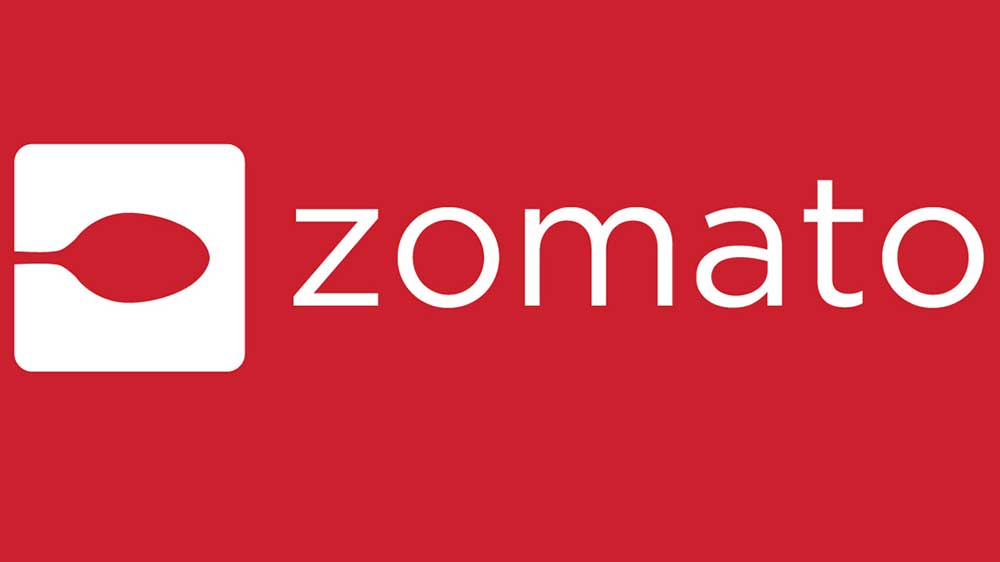

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

hotel_df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/UNSUPERVISED/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/UNSUPERVISED/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look - Restaurant
hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# Dataset First Look - Reviews
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f' The shape of Restaurents data is',hotel_df.shape)
print(f' The shape of Reviews data is',review_df.shape)

 The shape of Restaurents data is (105, 6)
 The shape of Reviews data is (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info - Restaurant
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Dataset Info - Reviews
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f'No. of duplicates in Restaurants data is {hotel_df.duplicated().sum()}')
print(f'No. of duplicates in Reviews data is {review_df.duplicated().sum()}')

No. of duplicates in Restaurants data is 0
No. of duplicates in Reviews data is 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print('Missing Values in Restaurants Data:-')
print(hotel_df.isnull().sum(),'\n')

print('Missing Values in Reviews Data:-')
print(review_df.isnull().sum())

Missing Values in Restaurants Data:-
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Data:-
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


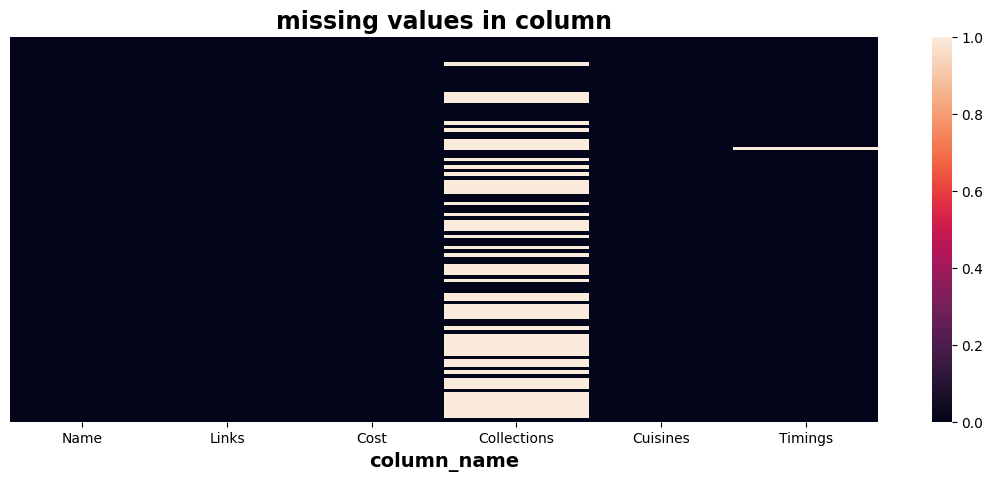

In [ ]:
# Visualizing the missing values - Restaurant

plt.figure(figsize=(14,5))
sns.heatmap(hotel_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

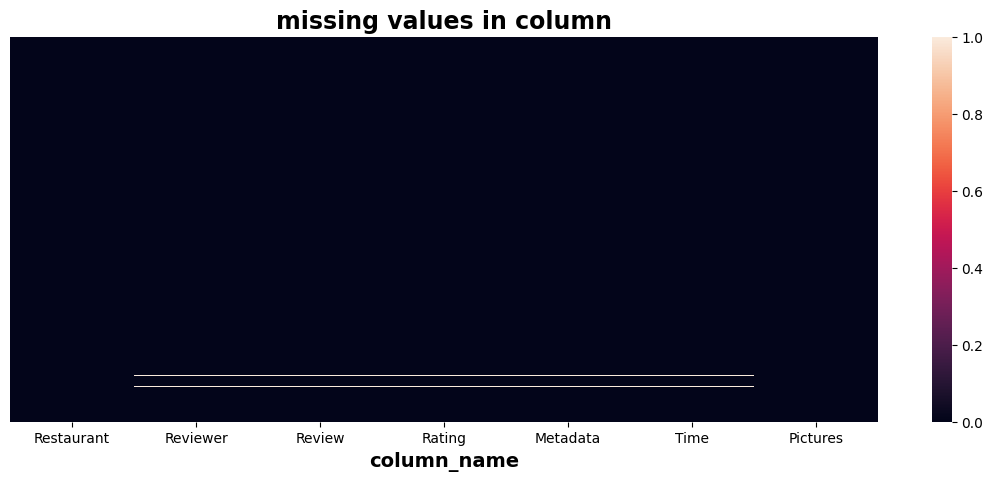

In [ ]:
# Visualizing the missing values - Reviews

plt.figure(figsize=(14,5))
sns.heatmap(review_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Restaurent Data

We have a limited number of rows and features in this dataset.
the type of 'Cost' should be an integer, but it is an object that must be treated.
the 'Time' characteristic must indicate the specific working hours of the restaurant, but here it is unstructured.
It has no duplicate values
the column "Time" has a null value and the characteristic 'Collection' has 51% null values.

Reviews Data

1000 rows and 7 features are presented in this data.
except 'Restaurent' and 'Pictures' each characteristic has some zeros.
the Dtype of 'Rating' must be int, but it shows an object.
36 values are duplicated in this data, and most duplicates have zero values
the feature 'Timing' should be datetime, but it shows object.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f'Restaurant data columns:- {list(hotel_df.columns)}\n')
print(f'Review data columns:- {list(review_df.columns)}')

Restaurant data columns:- ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Review data columns:- ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe - Restaurant
hotel_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
# Dataset Describe - Reviews
review_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

Restaurant data

Name : Restaurant name

Links : Web links of restaurants

Cost : Per person estimated cost for a meal

Collection : Keywording of restaurants by Zomato categories

Cuisines : Cuisines offered by the restaurants

Hours : Opening hours of the restaurants

Reviews data

Restaurant : Name of the restaurant

Reviewer : Name of the reviewer

Review : Text of the rating

Rating : Rating given by the reviewer

MetaData : Reviewer metadata - number of ratings and followers

Time : Date and time of the rating

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

print('No. of Unique values in Restaurant Data')
print(hotel_df.nunique(), '\n')

print('No. of Unique values in Reviews Data')
print(review_df.nunique())

No. of Unique values in Restaurant Data
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

No. of Unique values in Reviews Data
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [ ]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()

## 3. ***Data Wrangling***

### Data Wrangling Code

####   For Restaurant Data

In [ ]:
# check the unique values of cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [ ]:
# converting cost column into int64
hotel = hotel.astype({'Cost':'int'})

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [ ]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

####   For Review Data

In [ ]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers'] = review['Metadata'].str.split(',').str
review['No_of_reviews'] = pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  No_of_reviews  \
0           1 Review , 2 Followers  5/25/2019 15:54         0            1.0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0            3.0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0            2.0   
3            1 Review , 1 Follower  5/24/2019 22:11         0            1.0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0            3.0   
...                            ...              ...       ...            ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0           53.0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0            2.0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3           65.0   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0           13.0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6          472.0   

      Followers  
0           2.0  
1           2.0  
2           3.0  
3           1.0  
4           2.0  
...         ...  
9995       54.0  
9996       53.0  
9997      423.0  
9998      144.0  
9999     1302.0  

[10000 rows x 9 columns]

In [ ]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [ ]:
# convert the 'Time' column from object to datetime data type
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M')
review['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [ ]:
# Converting Time to date time and extracting Hour and year
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Month']=pd.DatetimeIndex(review['Time']).month
review['Hour'] = pd.DatetimeIndex(review['Time']).hour

In [ ]:
review.describe()

Pictures  No_of_reviews     Followers         Year        Month  \
count  10000.000000    9962.000000  10000.000000  9962.000000  9962.000000   
mean       0.748600      23.990865    162.374800  2018.452118     6.017868   
std        2.570381      50.615027    618.852357     0.562494     3.159464   
min        0.000000       0.000000      0.000000  2016.000000     1.000000   
25%        0.000000       1.000000      1.000000  2018.000000     4.000000   
50%        0.000000       4.000000      6.000000  2018.000000     5.000000   
75%        0.000000      22.000000     63.000000  2019.000000     8.000000   
max       64.000000    1031.000000  13410.000000  2019.000000    12.000000   

              Hour  
count  9962.000000  
mean     15.187412  
std       6.579646  
min       0.000000  
25%      12.000000  
50%      16.000000  
75%      21.000000  
max      23.000000

In [ ]:
# Total count of ratings from 1 star to 5 star
ratings = review['Rating'].value_counts().reset_index()
ratings.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings.rename(columns={'Rating': 'Count'}, inplace=True)
ratings

Ratings(1-5)  Count
0            5   3832
1            4   2373
2            1   1735
3            3   1193
4            2    684
5          4.5     69
6          3.5     47
7          2.5     19
8          1.5      9
9         Like      1

In [ ]:
# drop the rows where 'Rating' is not equal to 'Like'
review = review[review['Rating'] != 'Like']

In [ ]:
# Converting Rating dtype into float
review['Rating'] = review['Rating'].astype('float')

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Reviewer       9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
 7   No_of_reviews  9961 non-null   float64       
 8   Followers      9999 non-null   float64       
 9   Year           9961 non-null   float64       
 10  Month          9961 non-null   float64       
 11  Hour           9961 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1015.5+ KB


In [ ]:
# extract Review_count and Followers from Metadata
review['Review_count'] = review['Metadata'].str.extract('(\d+) Review')
review['Followers'] = review['Metadata'].str.extract('(\d+) Follower')

In [ ]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
review['Review_count'] = pd.to_numeric(review['Review_count']).fillna(0).astype(int)
review['Followers'] = pd.to_numeric(review['Followers']).fillna(0).astype(int)

In [ ]:
# Dropping unnecessary column as it is not needed now
review = review.drop(columns=['Metadata'])
review.isnull().sum()

Restaurant        0
Reviewer         38
Review           45
Rating           38
Time             38
Pictures          0
No_of_reviews    38
Followers         0
Year             38
Month            38
Hour             38
Review_count      0
dtype: int64

In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Find out the costliest restaurants
costly_res=hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Name    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

In [ ]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Name   Cost
0       Mohammedia Shawarma  150.0
1                      Amul  150.0
2              Sweet Basket  200.0
3                 KS Bakers  200.0
4             Momos Delight  200.0
5        Hunger Maggi Point  200.0
6            Asian Meal Box  200.0
7               Wich Please  250.0
8  Shah Ghouse Spl Shawarma  300.0
9                  Tempteys  350.0

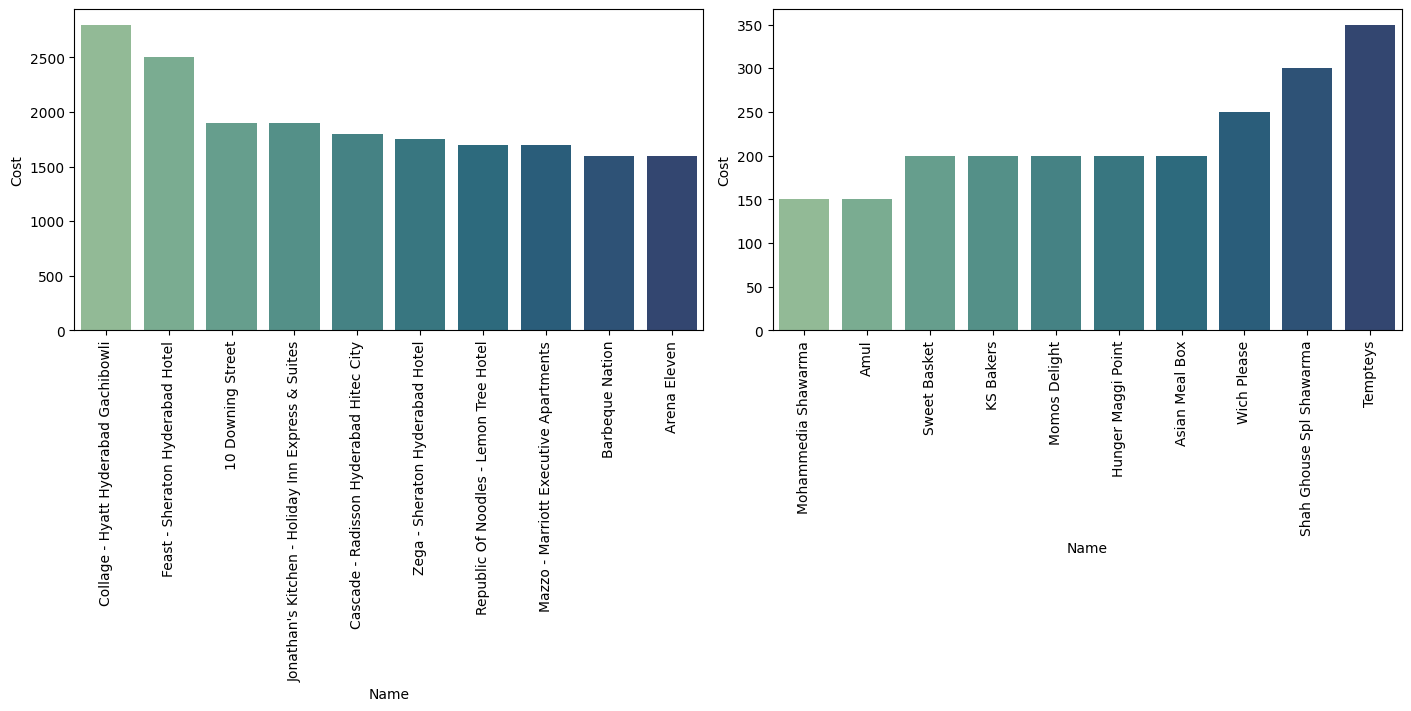

In [ ]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Name',y = 'Cost',data = costly_res,ax = axes[0],palette = 'crest')
a.set_xticklabels(labels=costly_res['Name'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Name',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'crest')
b.set_xticklabels(labels=cheapest_res['Name'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a univariate chart that is excellent for plotting different observations of a single characteristic. The above chart was chosen to visualize which restaurants on Zomato are expensive and which are cheap.

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant with a price of 2800 rupees, followed by "Feast - Sheraton Hyderabad Hotel" with a price of 2500 rupees. Other expensive restaurants can be seen from the chart and table.

Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of 150 rupees followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is 200 rupees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight we learn which restaurants have dishes with lower prices. So, a middle-income person can easily afford it. This can be beneficial for both the restaurant in question and Zomato, as more people will order food from Zomato.

Also, we learn which restaurants are the most expensive, which leads to a negative growth of these restaurants, as they are afraid of losing money if they do not achieve the desired taste among customers.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

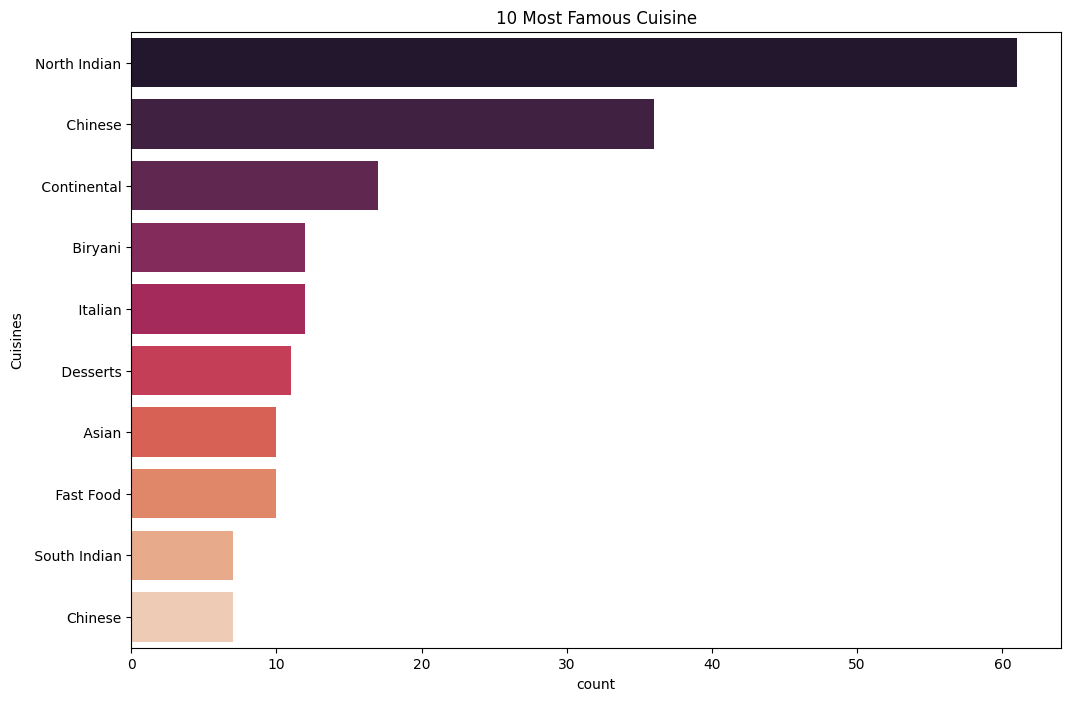

In [ ]:
#visualisation of most famous cuisines
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='rocket')
plt.title('10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Since categorical features are best visualized by a bar chart. Therefore a bar chart is used.The above chart was chosen to visualize the most 10 famous cuisines.

##### 2. What is/are the insight(s) found from the chart?

It can be clearly seen that North Indian cuisine is most commonly served in restaurants, followed by Chinese and Continental cuisine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be helpful for new entrepreneurs who want to open new restaurants in their area, so they can learn what people like most and add that cuisine to their menu.

#### Chart - 3

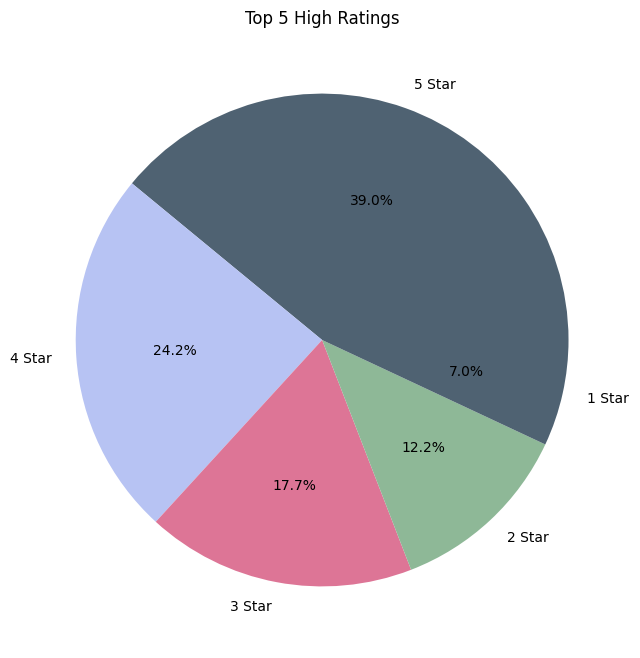

In [ ]:
# Chart - 3 visualization code
# Pie Plot of Total count of ratings from 1 star to 5 star
plt.figure(figsize=(15,8))
x_label = review['Rating'].value_counts().index
y_label = review['Rating'].value_counts().values
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 High Ratings', color= 'black')
plt.show()


##### 1. Why did you pick the specific chart?

The main purpose of using a pie chart is to show a part-whole relationship in our data. The parts of the chart are proportional to the proportion of the total in each category. The total "pie" represents one hundred percent of the whole, while the "pie "slices" also denote parts of the whole. It shows the total coverage by space type, neighbourhood group, and neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

Diagram shows that most of the restaurants have 4 and 5 stars, distributed in 39% and 24.2%, respectively. Restaurants with 1 star have only 7% of the ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We have found that a smaller number of different types of dishes can affect the image of the restaurant, as customers are primarily looking for the different types of dishes according to their preferences.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
reviewer_list = review.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

Reviewer  Review_Count
655         Ankita            13
3858   Parijat Ray            13
2654         Kiran            12
2313     Jay Mehta            11
7013  Vedant Killa            11

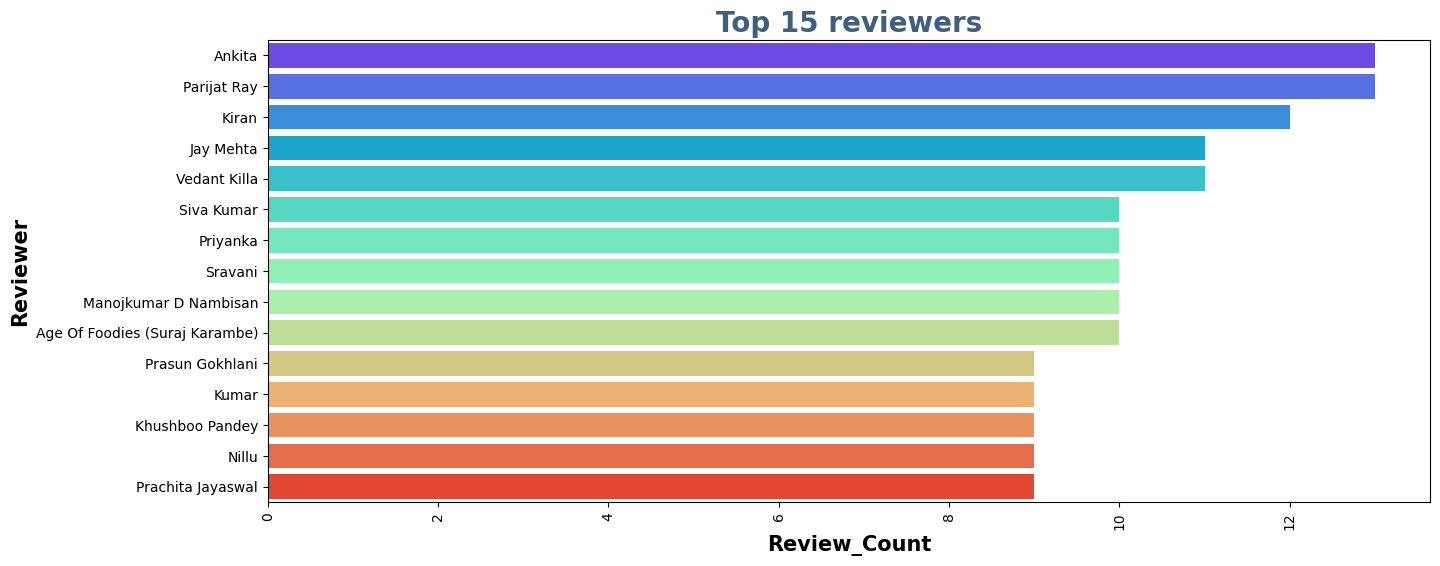

In [ ]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a univariate chart that is excellent for plotting different observations of a single characteristic. The above chart was chosen to visualize the top reviewers that have more review

##### 2. What is/are the insight(s) found from the chart?


From the above diagram, we found that the reviewer named Ankita gave the highest ratings which is greater than 12.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top reviewers will always check the reviews before going to a restaurants, so it's essential to strive for positive reviews from the majority of them.

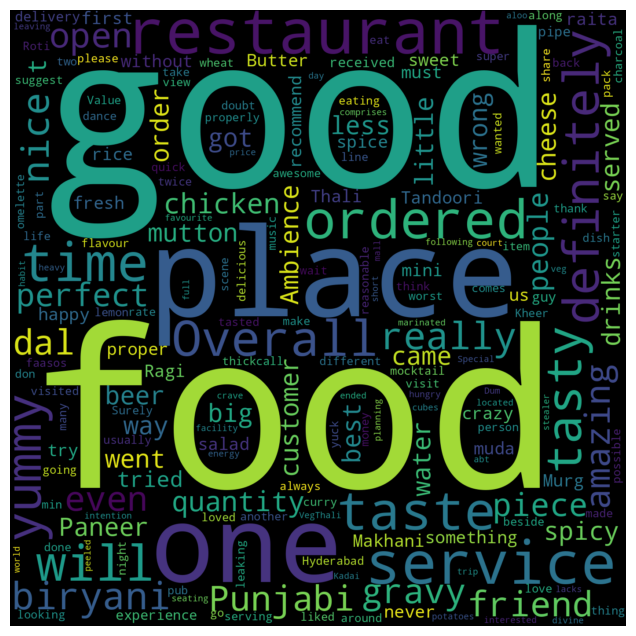

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

#### Chart - 5

In [ ]:
# Review per hour
reviews_hour = review.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

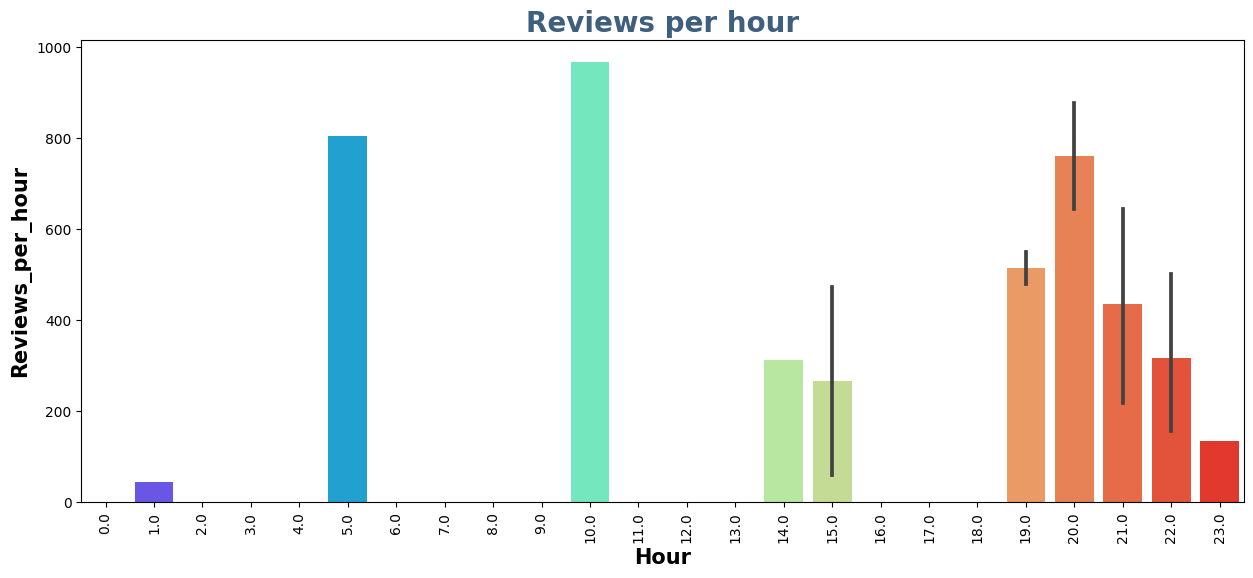

In [ ]:
# Chart - 5 visualization code
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = review['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()


##### 1. Why did you pick the specific chart?

Barplot shows the observations in each categorical bin using bars. The above chart is the reviews per hour v/s hours

##### 2. What is/are the insight(s) found from the chart?

As we can see, there is an increase in reviews from the afternoon to midnight. This is likely due to the fact that most people are working or at school during the morning hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the graph, a restaurant owner can decide on the peak times when most customers visit, so they can prepare the most food during those times.

#### Chart - 6

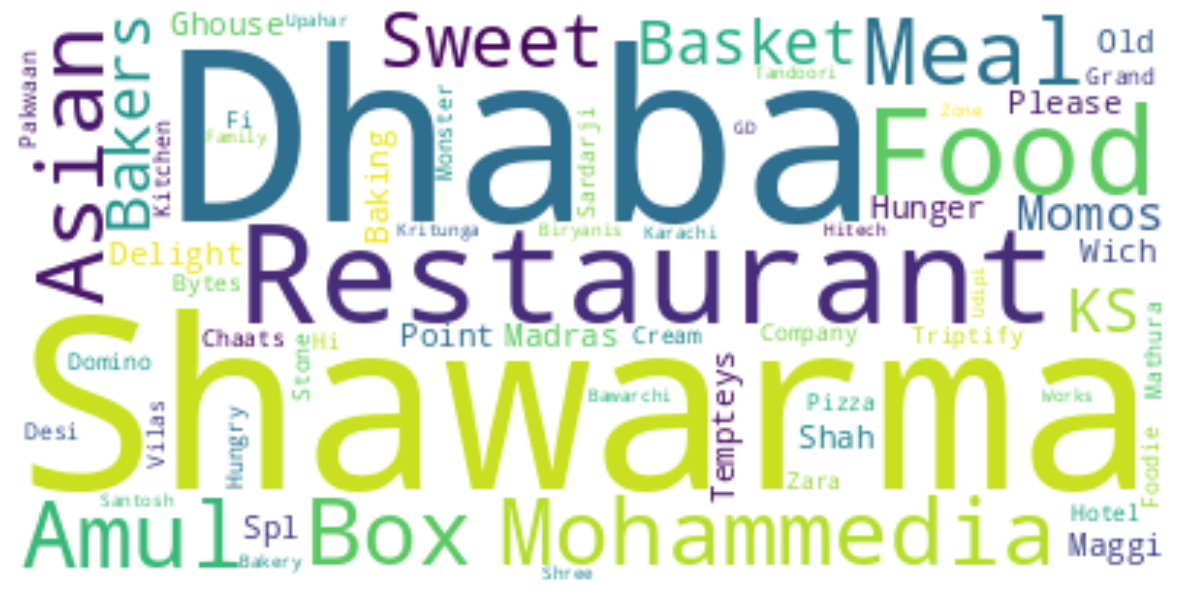

In [ ]:
# Chart - 6 visualization code
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Name[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show()

(-0.5, 1999.5, 1999.5, -0.5)

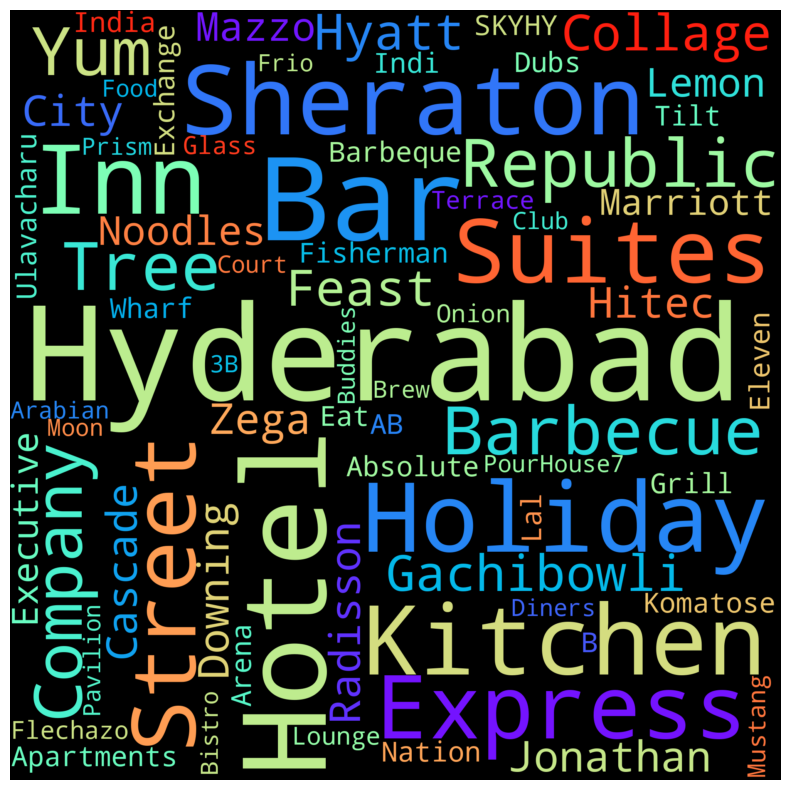

In [ ]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, the most repeating words are HYDERABAD, HOTEL, BAR for expensive restaurants, while for cheap restaurants SHAWARMA, DHABA, RESTAURANTS these words are repeating most.So it can be inferred that Hotel and Bars of Hyderabad are expensive while Dhabas and Restaurants are cheaper.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above wordcloud a customer will strike the repaeting words.

#### Chart - 7

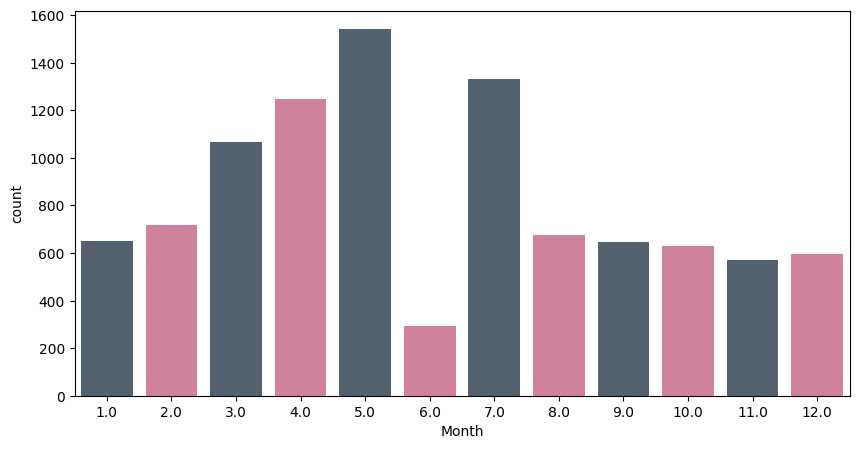

In [ ]:
# Chart - 7 visualization code
#count plot of review w.r.t month
plt.figure(figsize=(10,5))
sns.countplot(x=review['Month'],palette=['#4F6272','#DD7596'])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable. The above chart shows count plot of most reviewed month.

##### 2. What is/are the insight(s) found from the chart?

The count plot above clearly shows that the month of May had the highest number of customers providing reviews for a restaurant, while the month of July had the lowest number of reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the above diagram, a restaurant owner can determine the busiest month by analyzing high review ratings, indicating that more customers visited the restaurant during that time.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# No of reviews given to the restaurants
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

Restaurant  No_of_reviews
0                               Pista House         1031.0
1                                   Labonel         1031.0
2      Collage - Hyatt Hyderabad Gachibowli         1031.0
3                               Owm Nom Nom          685.0
4             The Old Madras Baking Company          665.0
5                              Aromas@11SIX          560.0
6                         Hyderabadi Daawat          482.0
7                          Chinese Pavilion          472.0
8                                  Tempteys          452.0
9             The Old Madras Baking Company          452.0
10  Cascade - Radisson Hyderabad Hitec City          452.0
11                                  T Grill          443.0
12                              Pista House          443.0
13                          Diners Pavilion          443.0
14                            Momos Delight          443.0
15                                KS Bakers          443.0
16                 Shah Ghouse Spl Shawarma          443.0
17  Cascade - Radisson Hyderabad Hitec City          417.0
18  Cascade - Radisson Hyderabad Hitec City          414.0
19                             Karachi Cafe          411.0

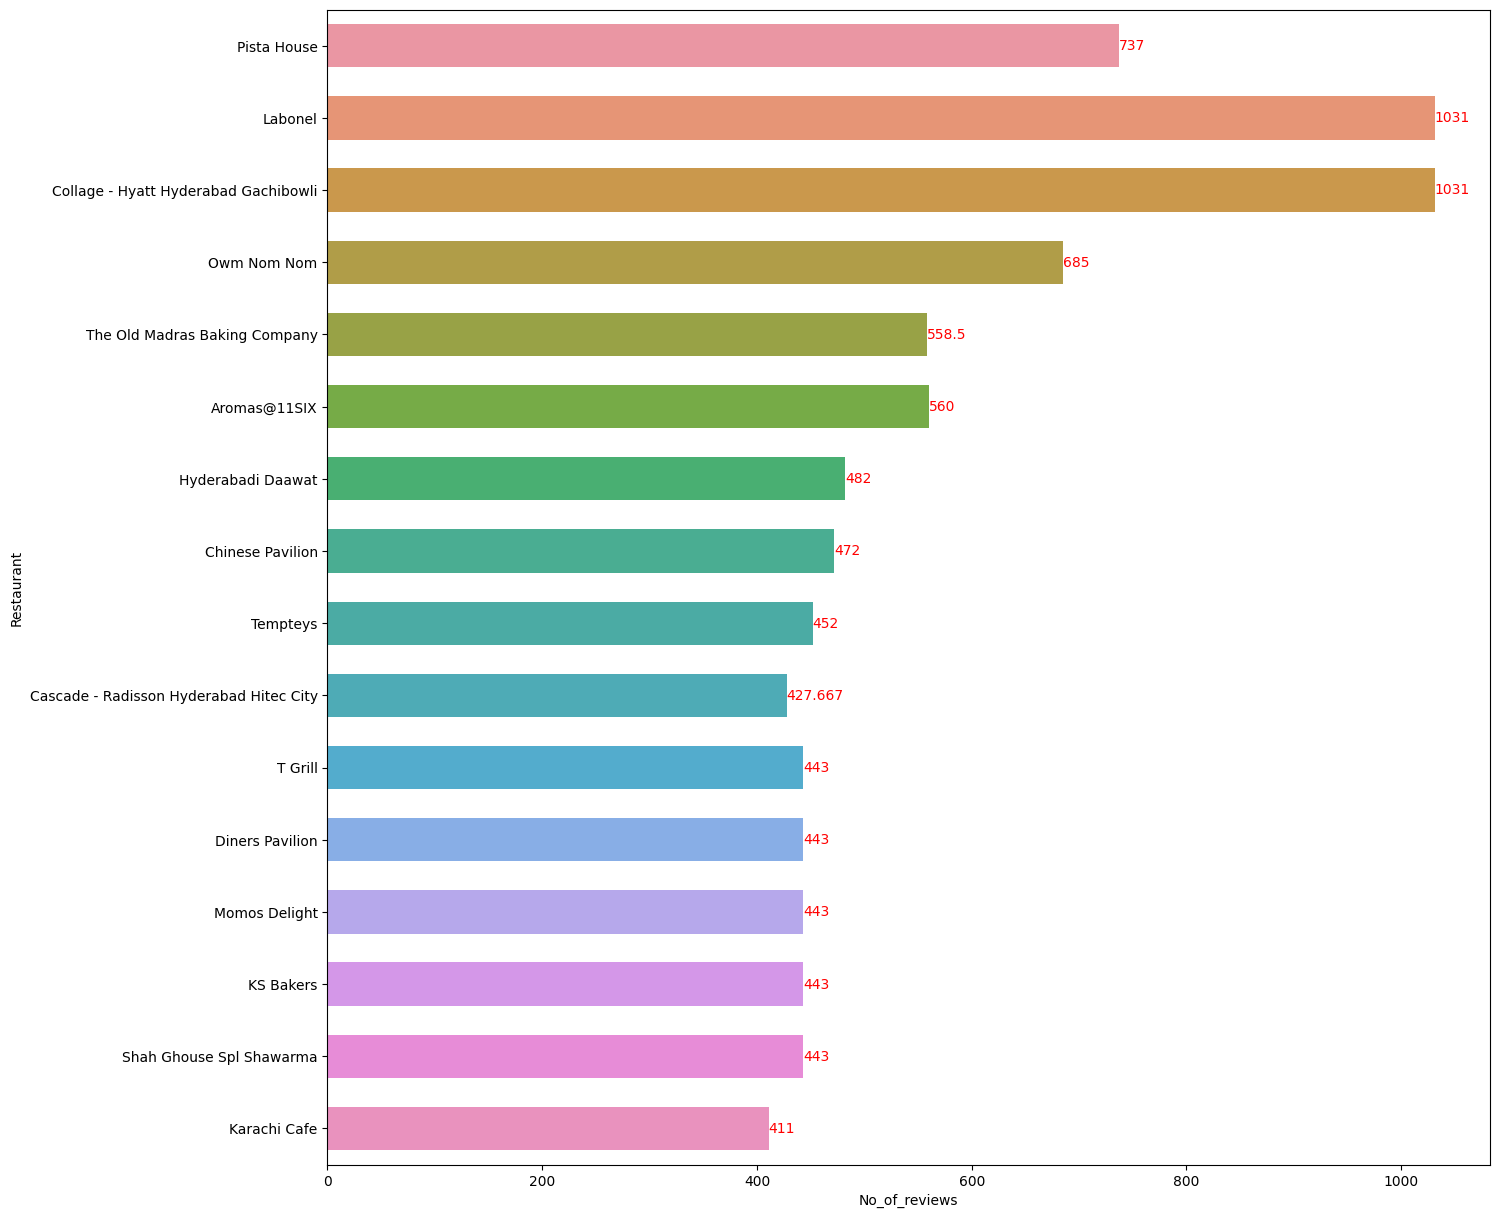

In [ ]:
# No of reviews for top 20 restaurants(by reviews)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review,errwidth = 0, width = 0.6)
ax.set_facecolor("white")
ax.bar_label(ax.containers[0], color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

In order to determine which restaurants have received the highest number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Here, Labonel and Collage at the Hyatt Hyderabad Gachibowli, with a total of 1031 positive reviews, are the most highly rated restaurants, making them a great choice.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))


In [ ]:
# Restaurants with highest number of reviewer followers
follower_top10=follower_count.head(10)
follower_top10

Restaurant  Followers
0                              Pista House      51068
1  Komatose - Holiday Inn Express & Suites      46229
2                        Hyderabadi Daawat      45375
3                    The Tilt Bar Republic      42126
4                           Dunkin' Donuts      37667
5                         Chinese Pavilion      35426
6                                   Faasos      34640
7                                  T Grill      32222
8  Cascade - Radisson Hyderabad Hitec City      31644
9                          Barbeque Nation      30866

In [ ]:
# Restaurants with lowest number of reviewer followers
follower_bottom10=follower_count.tail(10)
follower_bottom10

Restaurant  Followers
90                               Flechazo       2748
91                    Kritunga Restaurant       2223
92                       Hotel Zara Hi-Fi       1818
93         3B's - Buddies, Bar & Barbecue       1676
94                 Royal Spicy Restaurant       1497
95                               Delhi-39       1222
96              AB's - Absolute Barbecues       1060
97                               Paradise        798
98                    Mohammedia Shawarma        791
99  Shree Santosh Dhaba Family Restaurant        562

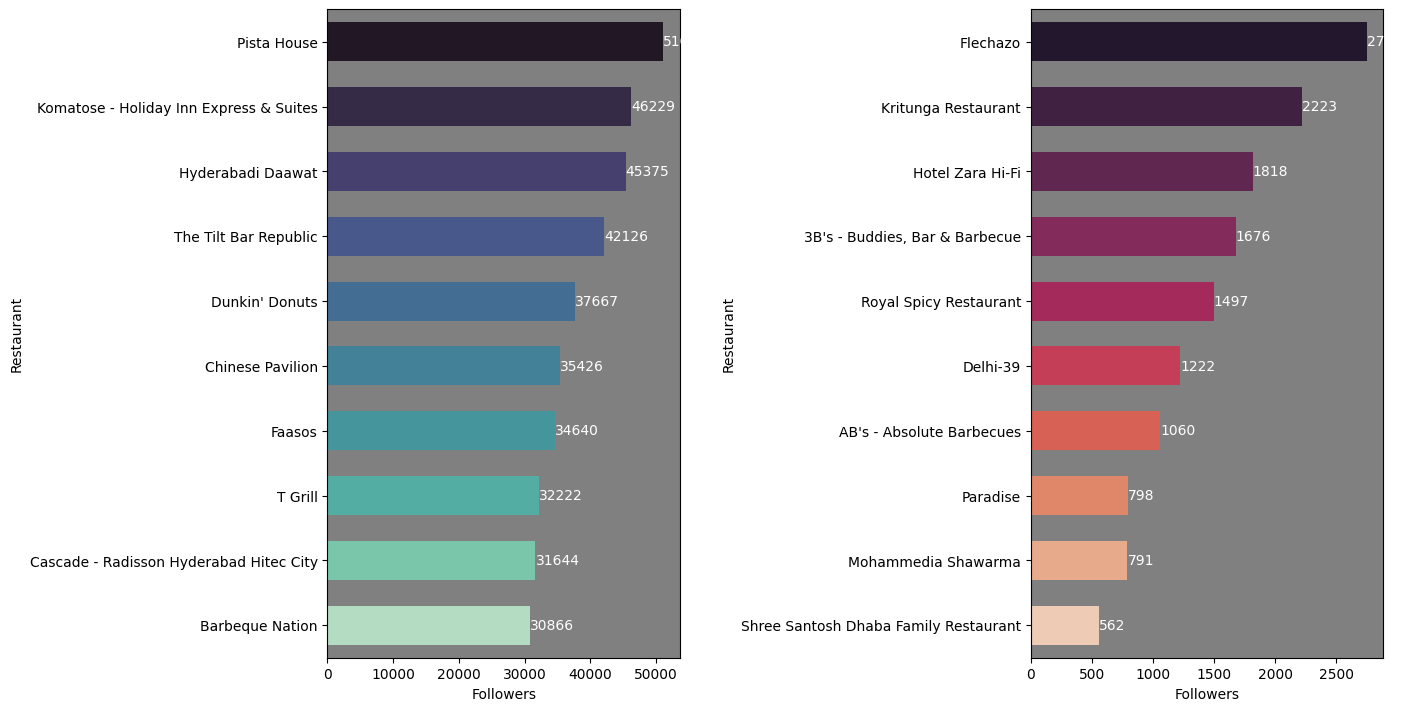

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("red")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_top10['Restaurant'].to_list())
a.set_facecolor("grey")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("red")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_bottom10['Restaurant'].to_list())
b.set_facecolor("grey")

##### 1. Why did you pick the specific chart?

Barplot is used to see the least and most follower of reviewer of the restaurants.

##### 2. What is/are the insight(s) found from the chart?

The reviewer of "Pista House" has the most followers, while the reviewers of "Shree Santosh Dhaba Family Restaurant" have the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bussiness men can find the trend of the customers.

#### Chart - 14 - Correlation Heatmap

In [ ]:
#changing the name of the column to restaurant_name
hotel.rename({'Name':'Restaurant_name'},axis=1, inplace=True )
hotel.head(2)

Restaurant_name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1         Paradise  https://www.zomato.com/hyderabad/paradise-gach...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   

                                         Timings  No_of_cuisine  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              6  
1                                 11 AM to 11 PM              3

In [ ]:
#changing the restuarant column name to restaurant_name
review.rename({'Restaurant':'Restaurant_name'},axis=1, inplace=True )
review.head(2)

Restaurant_name              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   

                 Time  Pictures  No_of_reviews  Followers    Year  Month  \
0 2019-05-25 15:54:00         0            1.0          2  2019.0    5.0   
1 2019-05-25 14:20:00         0            3.0          2  2019.0    5.0   

   Hour  Review_count  
0  15.0             1  
1  14.0             3

In [ ]:
# merging both the data together on Restaurant_name column
zomato_df = pd.merge(hotel, review.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_df.shape

(9968, 18)

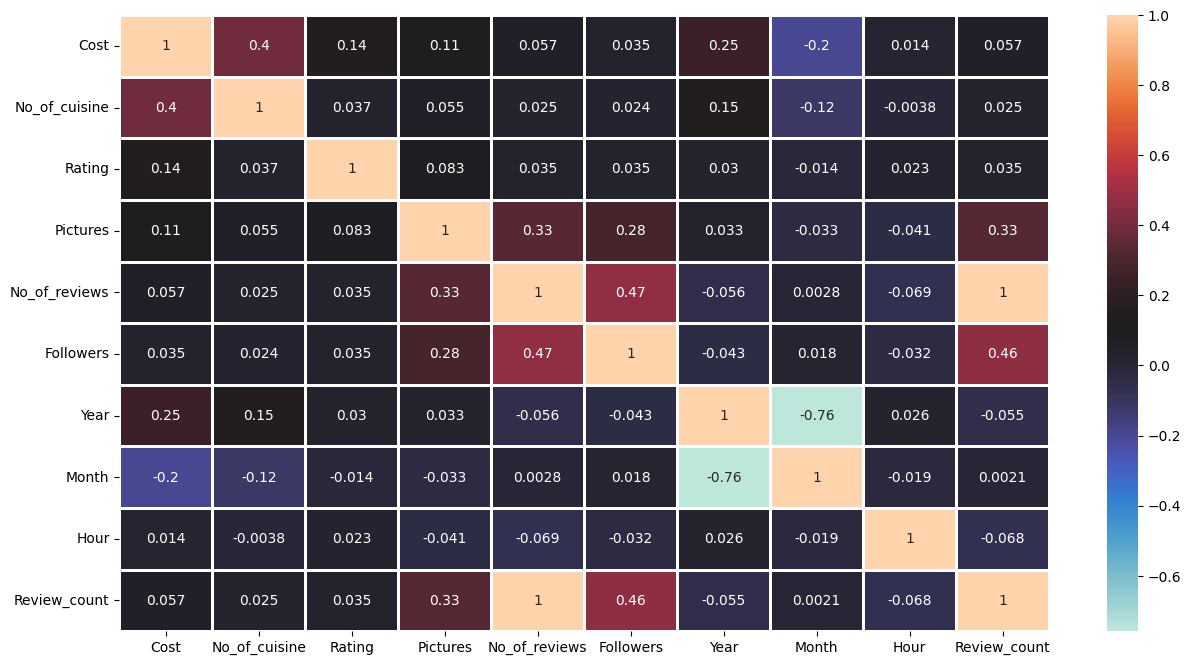

In [ ]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(zomato_df.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table that shows the correlation coefficients between variables. It can be used to summarize data, as well as input into more advanced analyses or as a diagnostic tool. The correlation coefficient can range from -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

There are 46% of positive correlation b/w Review_count and Followers.There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.There are also 35% of positive correlation b/w review_count and ratings.we conclude that there is no strong correlation between any variables.

#### Chart - 15 - Pair Plot

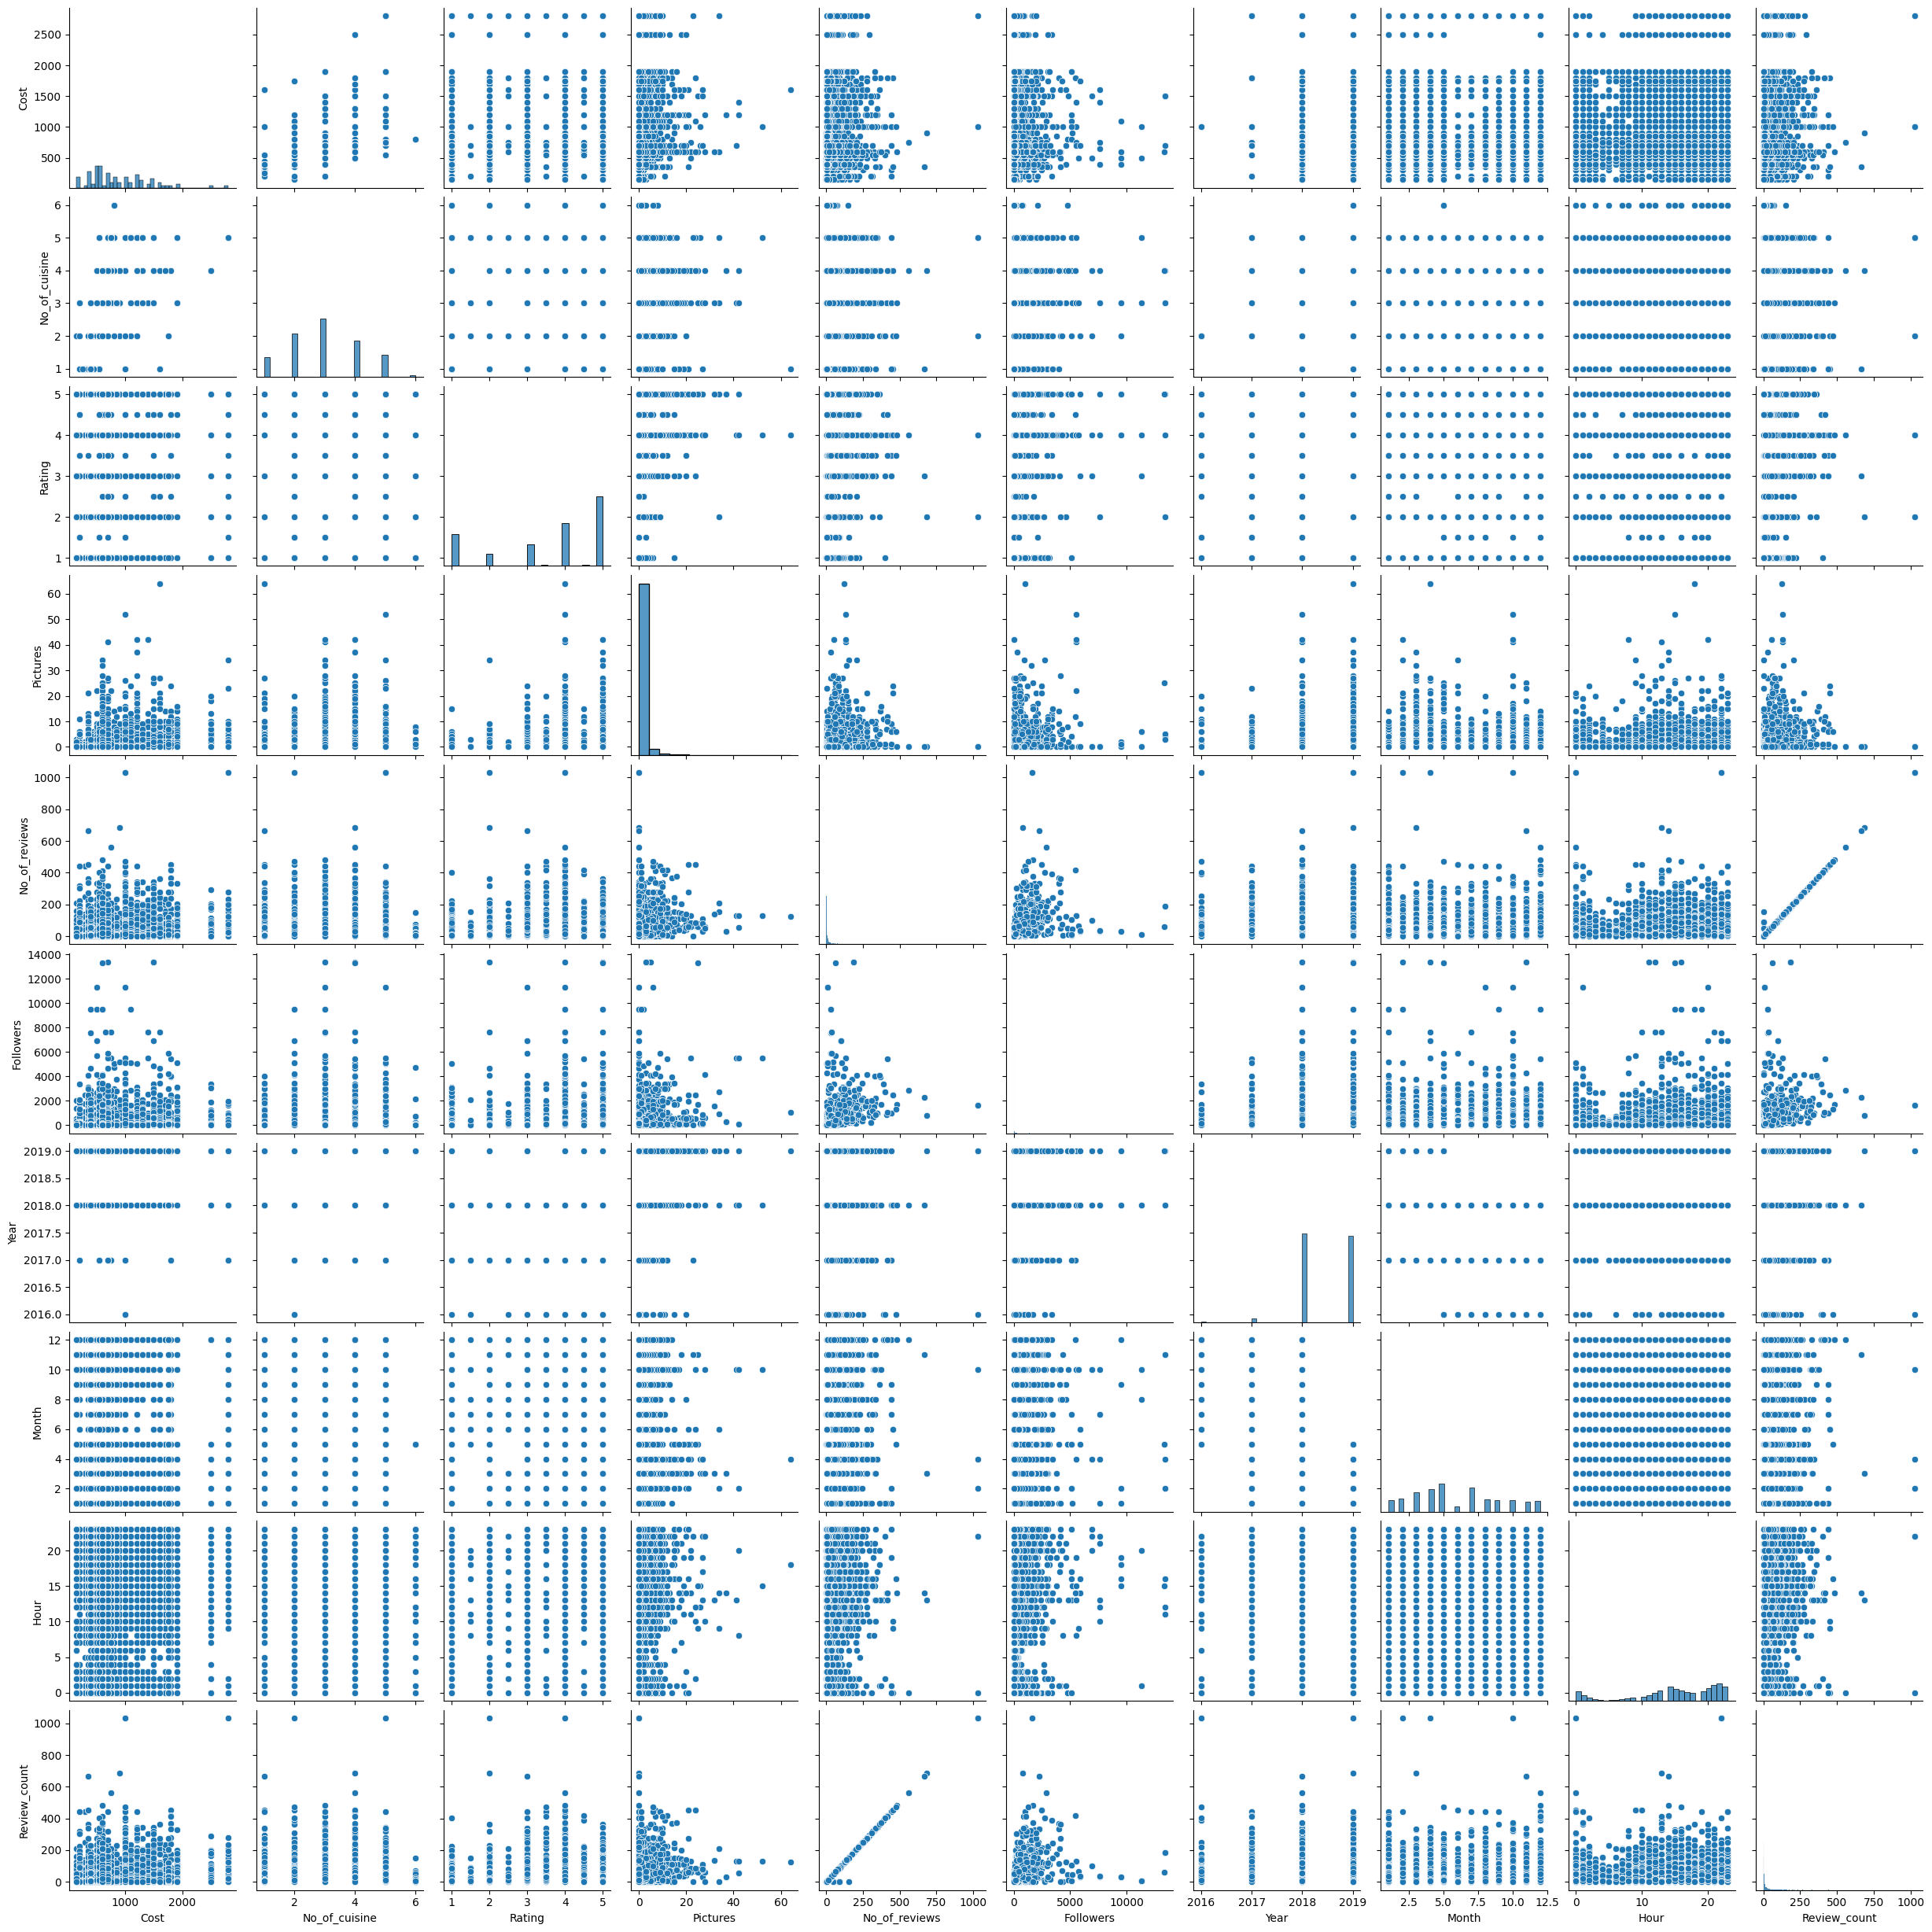

In [ ]:
# Pair Plot visualization code
sns.pairplot(zomato_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is a useful tool for understanding the relationship between two variables or clustering our data. It can also be used to create simple classification models by drawing lines to linearly separate our dataset. By analyzing the patterns and relationships in our data, pair plots provide a graphical representation similar to a correlation map.

##### 2. What is/are the insight(s) found from the chart?

There is no significant correlation between the given features in the merged dataframe.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Let's copy the original data and work on copied dataset
hotel_df=hotel.copy()
review_df=review.copy()

## Hotel dataset

In [ ]:
#Function to see the percent of missing value
def null_value_per(df):

  null_df=pd.DataFrame()
  null_count=df.isnull().sum()
  null_per = null_count/df.shape[0]*100
  null_df['Null_Count']=null_count
  null_df['Null_percent']=null_per

  return null_df

In [ ]:
# Check for null values in hotel_df

hotel_null_values = null_value_per(hotel_df)
hotel_null_values

Null_Count  Null_percent
Restaurant_name           0      0.000000
Links                     0      0.000000
Cost                      0      0.000000
Collections              54     51.428571
Cuisines                  0      0.000000
Timings                   1      0.952381
No_of_cuisine             0      0.000000

There is 1 null value in the Timings column, so we can fill it in with the mode of the column. The Collections column has more than 50% null values, so we should drop it. The Links column is not useful for data analysis, so we will also drop it. Now, let's check for one missing value in the Timings column.

In [ ]:
# checking for one missing value in Timings
hotel_df[hotel_df['Timings'].isnull()]

Restaurant_name                                              Links  Cost  \
30      Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  No_of_cuisine  
30         NaN  Andhra, South Indian, North Indian     NaN              3

In [ ]:
# Imputing timings missing value with mode of that column
from pandas._libs.hashtable import mode
hotel_df['Timings'].fillna(hotel_df.Timings.mode()[0],inplace = True)

In [ ]:
# Dropping the columns collection and Links
hotel_df.drop(columns = ['Collections'],axis = 1,inplace = True)

## Review dataset

In [ ]:
## Check for null values in review_df
review_null_values = null_value_per(review_df)
review_null_values

Null_Count  Null_percent
Restaurant_name           0      0.000000
Reviewer                 38      0.380038
Review                   45      0.450045
Rating                   38      0.380038
Time                     38      0.380038
Pictures                  0      0.000000
No_of_reviews            38      0.380038
Followers                 0      0.000000
Year                     38      0.380038
Month                    38      0.380038
Hour                     38      0.380038
Review_count              0      0.000000

In [ ]:
#filling null values in review_df  review column
review_df = review_df.fillna({"Review": "No Review"})

#### What all missing value imputation techniques have you used and why did you use those techniques?

For hotel dataset:
* The one null value in Timings was imputed using the mode of the column, since it is assumed that opening and closing times are similar for most restaurants.
* Since the collections contain more than 50% null values, this column was deleted.

For the Ratings dataset:
* Ratings column is missing values, so it was populated with 'No rating'.

### 2. Handling Outliers

### Anamoly Detection

In [ ]:
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])

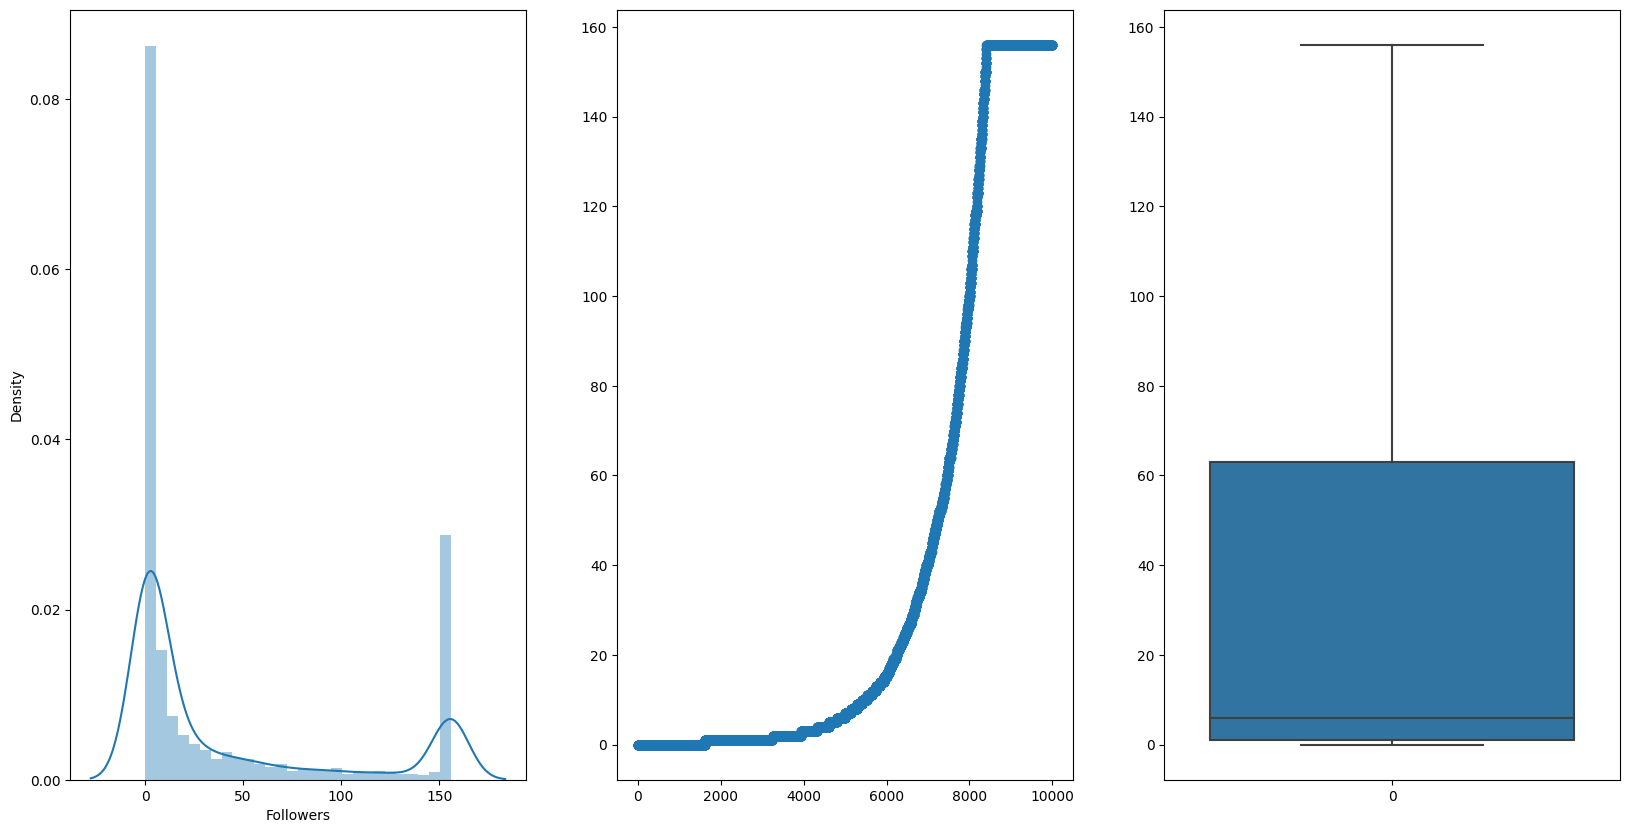

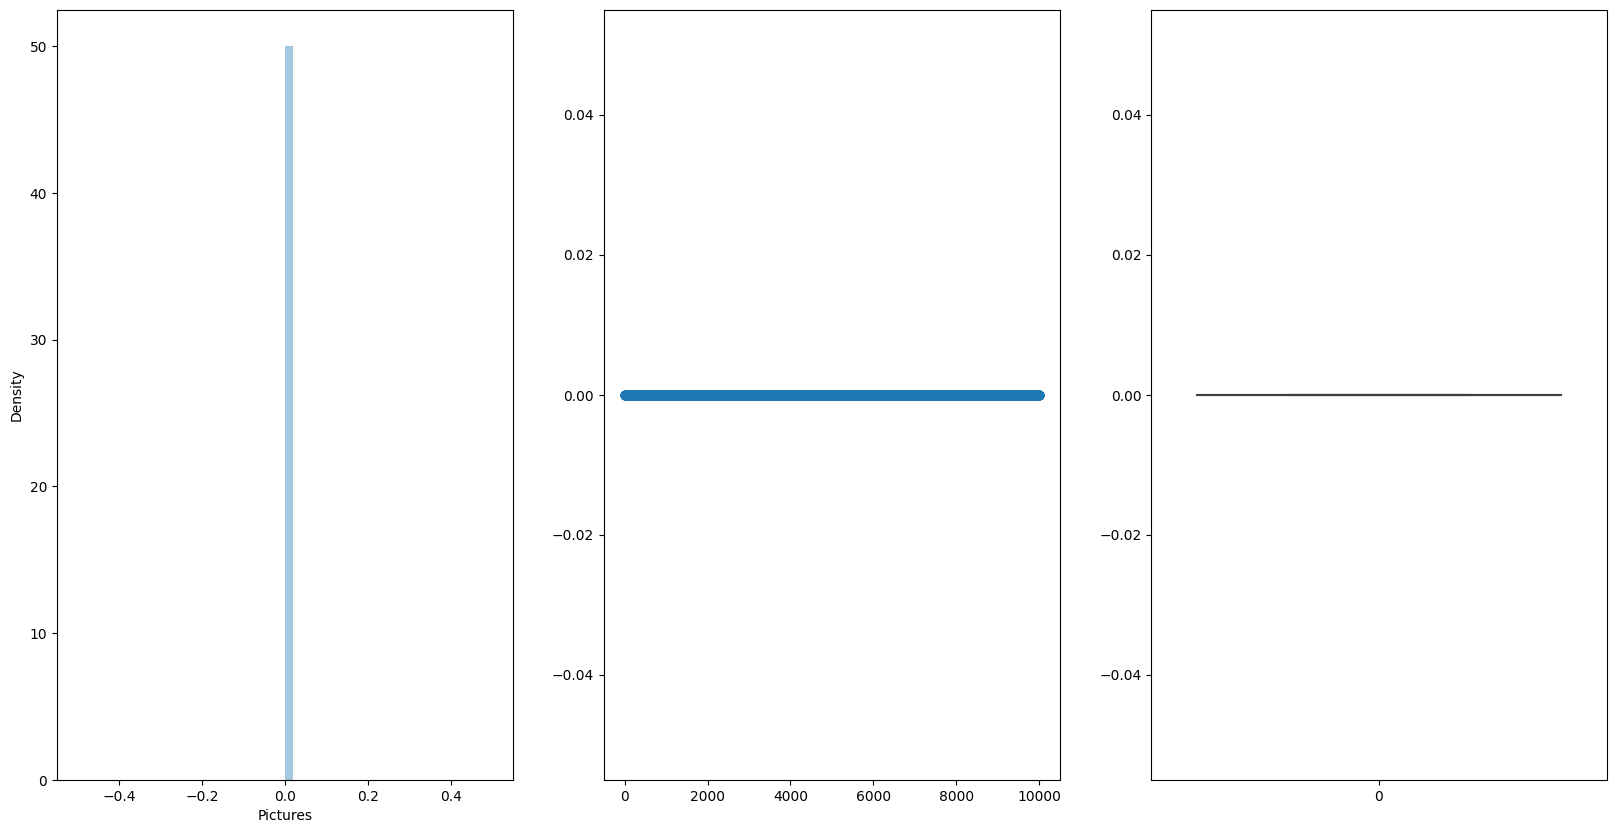

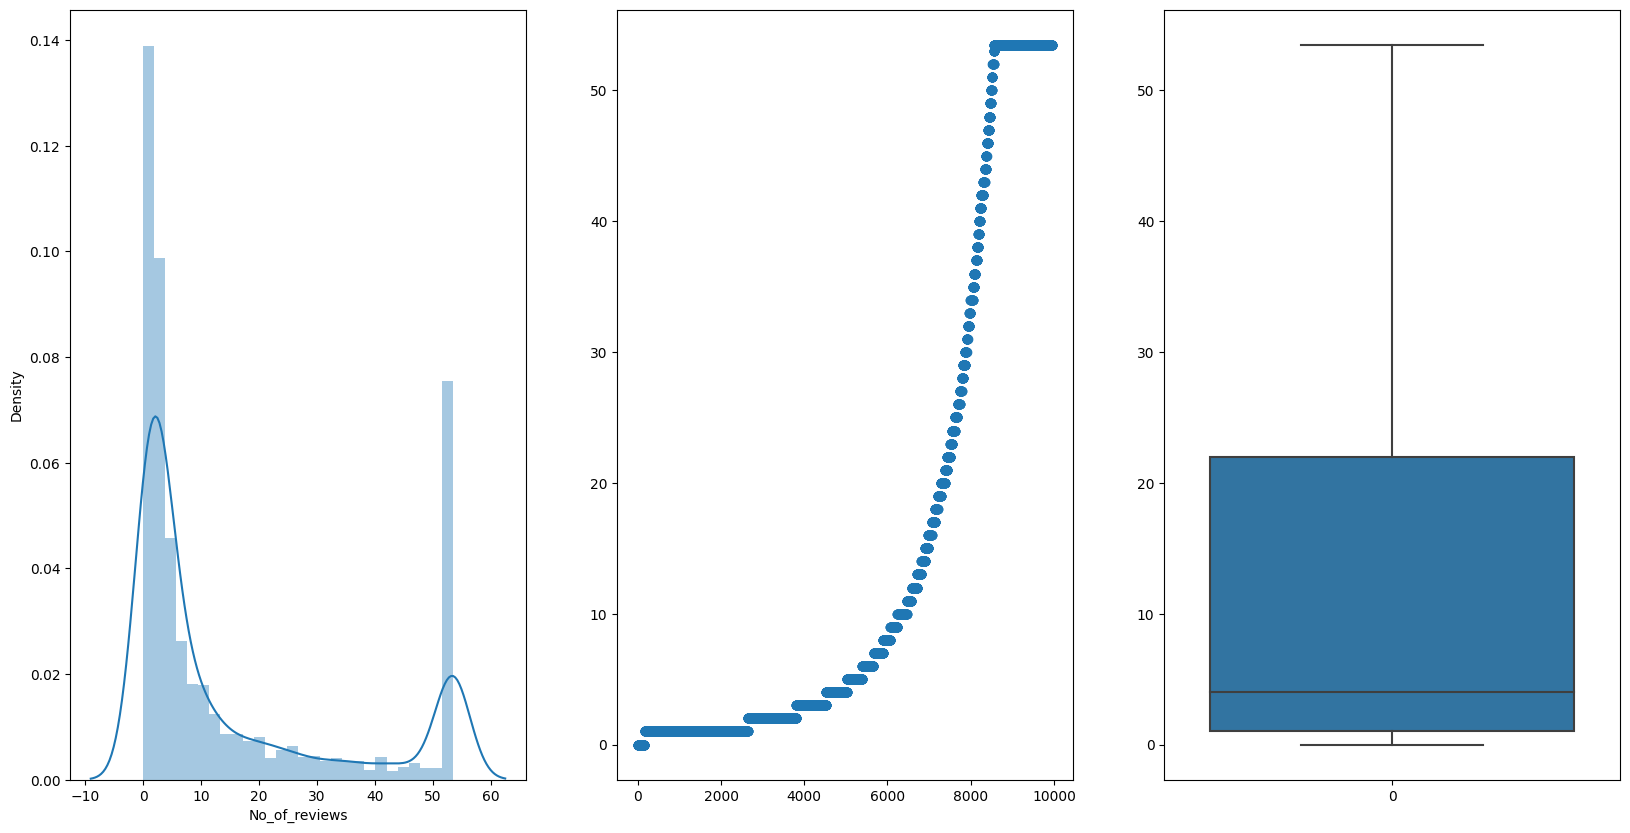

In [ ]:
# Getting outliers for review dataset
outlier_plots(review_df,['Followers','Pictures','No_of_reviews'])

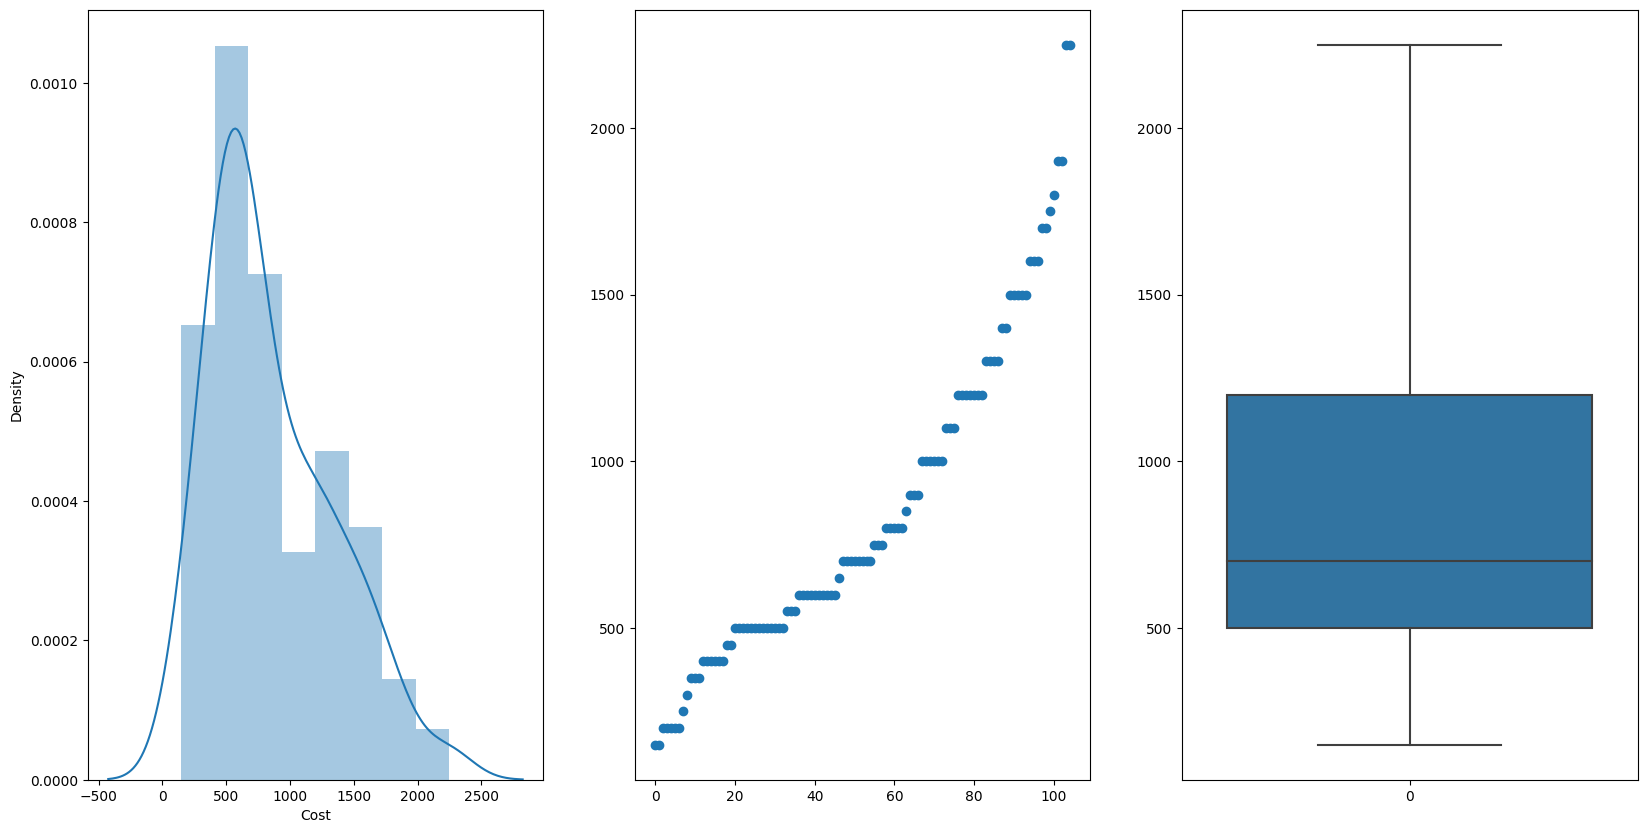

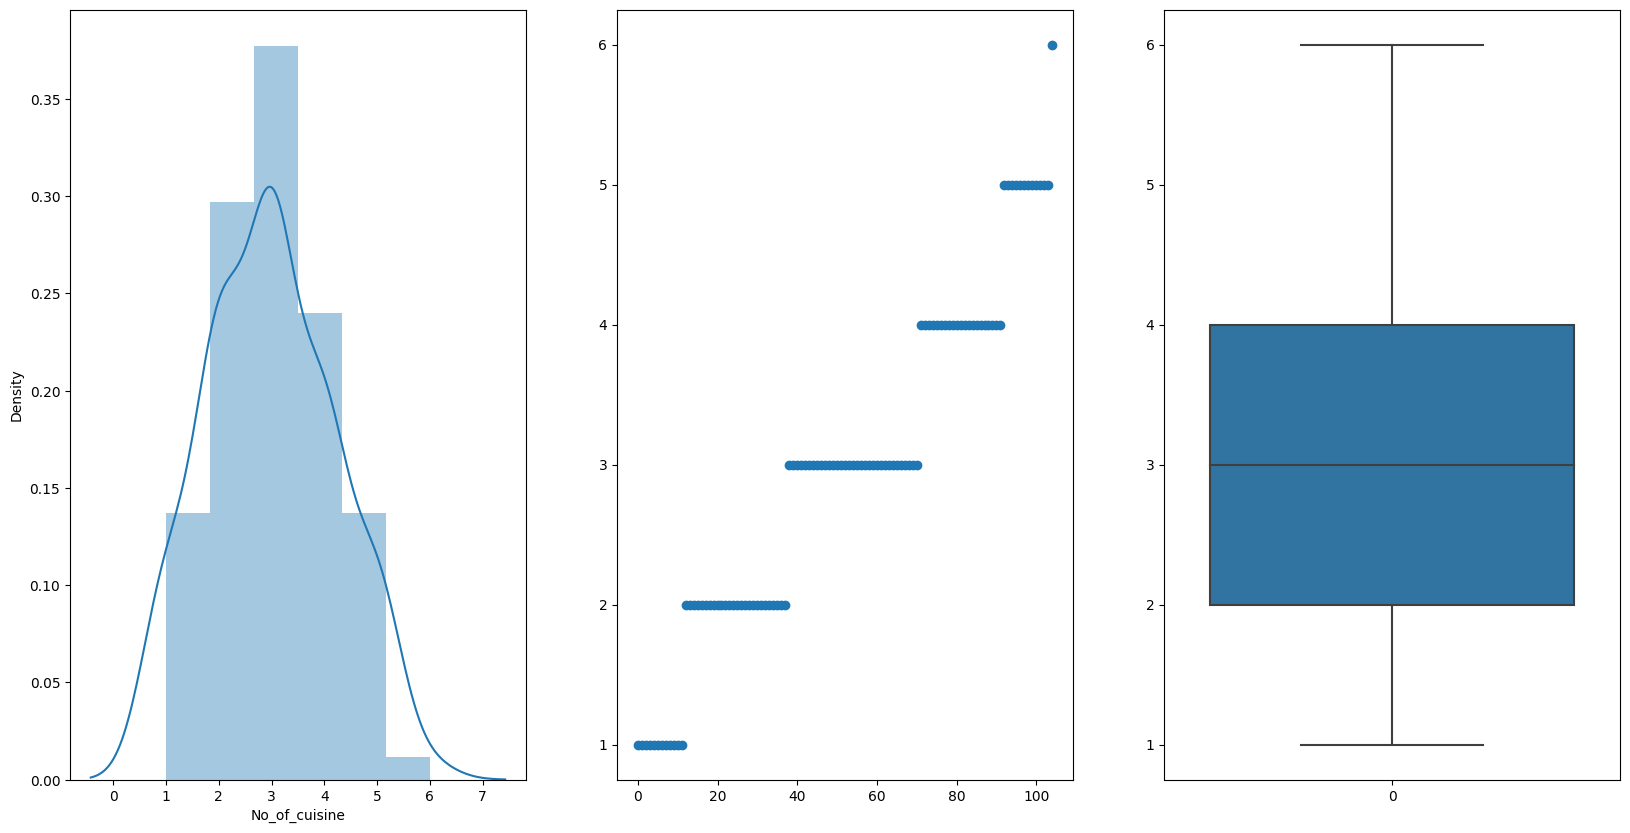

In [ ]:
# getting outliers for hotel dataset
outlier_plots(hotel_df,['Cost','No_of_cuisine'])

In [ ]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(hotel_df['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [ ]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

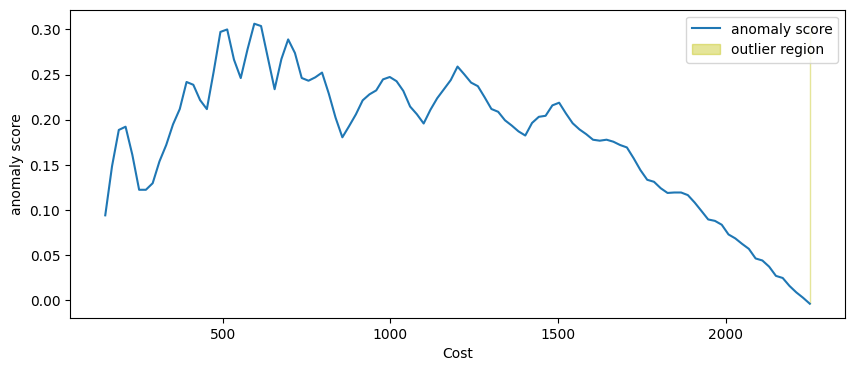

In [ ]:
#visualizing outlier for cost
visualize_outliers(hotel_df,'Cost')

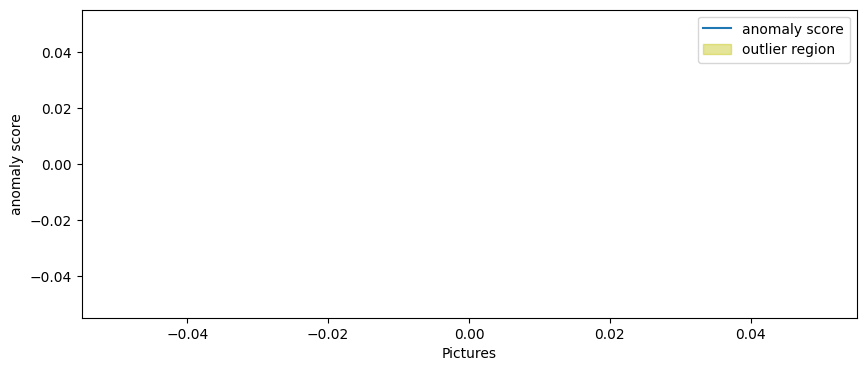

In [ ]:
#visualizing outlier for pictures
visualize_outliers(review_df,'Pictures')

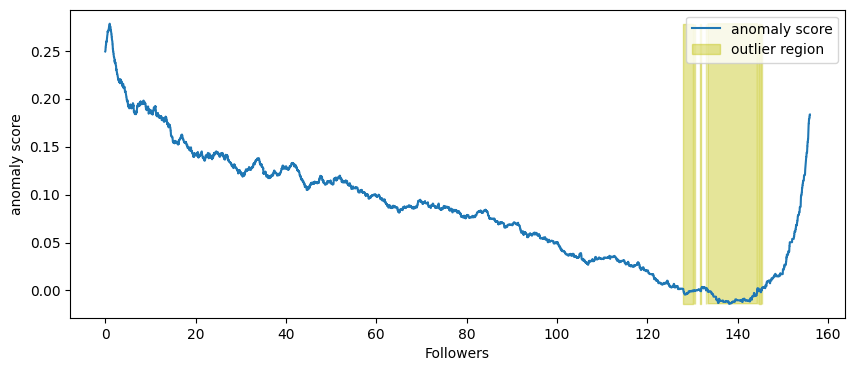

In [ ]:
#visualizing outlier for Followers
visualize_outliers(review_df,'Followers')

In [ ]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_bound = df[feature].quantile(0.25) - 1.5*IQR
  upper_bound = df[feature].quantile(0.75) + 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound

In [ ]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [ ]:
# Replace the outlier value with its upper bound and lower bound
replace_outliers(hotel_df,'Cost')
replace_outliers(review_df,'Pictures')
replace_outliers(review_df,'No_of_reviews')
replace_outliers(review_df,'Followers')

##### What all outlier treatment techniques have you used and why did you use those techniques?

For outlier detection, I used Isolation Forest, an unsupervised outlier detection technique. It assumes that points ending in shorter branches are indicative of anomalies because it was easier for the tree to separate them from other observations, while points deeper in the tree are less likely to be anomalies because they required more cuts to isolate them. For the treatment of outliers, the upper outliers were replaced by an upper bound and the lower outliers by a lower bound, since their maximum and minimum values cannot exceed these points.

### 3. Categorical Encoding

In [ ]:
hotel_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'No_of_cuisine'],
      dtype='object')

In [ ]:
# create the new dataframe for clustering
# And have encoding on cuisines
cluster_df = hotel_df.drop([ 'Timings'],axis=1)
cluster_df.head()

Restaurant_name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  No_of_cuisine  
0  Chinese, Continental, Kebab, European, South I...              6  
1                     Biryani, North Indian, Chinese              3  
2       Asian, Mediterranean, North Indian, Desserts              4  
3  Biryani, North Indian, Chinese, Seafood, Bever...              5  
4  Asian, Continental, North Indian, Chinese, Med...              5

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant_name  105 non-null    object
 1   Links            105 non-null    object
 2   Cost             105 non-null    int64 
 3   Cuisines         105 non-null    object
 4   No_of_cuisine    105 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


In [ ]:
# Encode your categorical columns
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_df = cluster_df.explode('Cuisines')

#removing extra trailing space from Cuisines after exploded
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for Cuisines
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix=["Cuisines"])

In [ ]:
#grouping each restaurant as explode created unnecessary rows
cluster_df = cluster_df.groupby("Restaurant_name").sum().reset_index()

#### What all categorical encoding techniques have you used & why did you use those techniques?

For encoding of categorical feature 'Cuisines'," first divided the cuisines into a list and then created dummy variables for each of the cuisines and assigned them to the restaurants.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# creating datafame for sentiment analysis
sentiment_df = review_df[['Review', 'Rating']]

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions
import contractions

In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)


In [ ]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [ ]:
sentiment_df.sample(3)

Review  Rating
9467  stopped in for a quick bite to tide us over ti...     4.5
8480  horrible service  tasteless food poor service ...     1.0
6748  love the shawarmasturkish special shawarmas is...     4.0

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#function to remove digits
def remove_digit(text):
  '''Function to remove digit from text'''
  char_str = '' .join((z for z in text if not z.isdigit()))
  return char_str

In [ ]:
#remove digit using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_digit)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# creating object for english stopwords
sw = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
# Installing and importing necessary libraries for removing emojis
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

In [ ]:
# Function to transform the emojis to its respective text form, using UNICODE_EMOJI
def handle_emoji(text):
  for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(handle_emoji)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Not nedeed

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df.sample(3)

Review  Rating
3416  [great, place, unwind, hot, sour, soup, recomm...     5.0
4250  [old, new, new, black_heart, th, century, them...     5.0
8072  [ordered, chicken, tikka, biryani, tandoori, c...     2.0

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  '''function for lemmatization'''
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

we have used lemmatization as a text normalization technique.

In lemmatization, words are reduced to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word to determine its base form, whereas stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate method for determining the stem form of a word because it takes into account both the context of the word and its grammatical structure.

I used lemmatization because it is a more accurate method of reducing words to their root form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of words is important.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# Not needed

#### 10. Text Vectorization

In [ ]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = sentiment_df['Review']
X= vectorizer.fit_transform(X)

In [ ]:
# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('ambience', 498), ('good', 6295), ('food', 5597), ('quite', 12170), ('saturday', 13248), ('lunch', 8898), ('cost', 3363), ('effective', 4675), ('place', 11438), ('sate', 13227), ('brunch', 2101), ('one', 10501), ('also', 417), ('chill', 2699), ('friend', 5828), ('parent', 10991), ('waiter', 16633), ('soumen', 14224), ('da', 3698), ('really', 12387), ('courteous', 3413), ('helpful', 6897), ('pleasant', 11541), ('evening', 4922), ('service', 13507), ('prompt', 11928), ('experience', 5096), ('kudos', 8359), ('must', 9899), ('try', 15943), ('great', 6500), ('thnx', 15527), ('pradeep', 11714), ('subroto', 14771), ('personal', 11275), ('recommendation', 12442), ('penne', 11204), ('alfredo', 335), ('pasta', 11067), ('music', 9873), ('background', 1191), ('amazing', 454), ('arun', 872), ('guy', 6644), ('behavior', 1493), ('sincerety', 13869), ('course', 3404), ('would', 17016), ('like', 8651), ('visit', 16553), ('goodwe', 6405), ('ordered', 10600), ('kodi', 8301), ('drumstick', 45

##### Which text vectorization technique have you used and why?

Here we have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

###(a). hotel_df

In [ ]:
hotel_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'No_of_cuisine'],
      dtype='object')

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
hotel_df.drop('Links',axis=1,inplace=True)

In [ ]:
review_df.columns

Index(['Restaurant_name', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'No_of_reviews', 'Followers', 'Year', 'Month', 'Hour', 'Review_count'],
      dtype='object')

In [ ]:
#dropping the metadata and Time column from review_df
review_df.drop(columns=['Time'], axis = 1, inplace=True)

In [ ]:
# for sentiment analysis, creating dependant variable based on rating
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1
    # positive sentiment
  else:
    return 0
    # negative sentiment

In [ ]:
# applying to sentiment dataset
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(sentiment)
sentiment_df

Review  Rating  Sentiment
0     [ambience, good, food, quite, good, saturday, ...     5.0          1
1     [ambience, good, pleasant, evening, service, p...     5.0          1
2     [must, try, great, food, great, ambience, thnx...     5.0          1
3     [soumen, da, arun, great, guy, behavior, since...     5.0          1
4     [food, goodwe, ordered, kodi, drumstick, baske...     5.0          1
5     [ambiance, good, service, good, food, apradeec...     5.0          1
6     [nice, place, ambience, different, food, order...     5.0          1
7     [well, reading, many, review, finally, visited...     4.0          1
8     [excellent, food, specially, like, spicy, food...     5.0          1
9     [came, birthday, treat, close, friend, perfect...     5.0          1
10    [service, great, food, awesome, service, staff...     5.0          1
11    [good, ambience, amazing, food, good, service,...     5.0          1
12    [food, good, soup, expected, starter, ordered,...     5.0          1
13    [food, good, telangana, kodiak, fry, must, try...     5.0          1
14    [ordered, corn, cheese, ball, manchow, soup, p...     1.0          0
15    [food, ambience, fantastic, waiter, manav, maj...     5.0          1
16    [came, lunch, food, good, tasty, tried, buffet...     4.0          1
17    [best, thing, place, food, favorite, go, dish,...     5.0          1
18    [polite, friendly, staff, nice, ambience, good...     5.0          1
19    [food, really, good, vegetarian, item, includi...     5.0          1
20    [beautiful, cozy, classy, time, place, truly, ...     5.0          1
21    [please, good, quite, expensive, coming, taste...     4.0          1
22    [service, good, fast, even, people, polite, we...     4.0          1
23    [farewell, feast, recently, enjoyed, well, goo...     5.0          1
24    [excellent, experience, mouthwatering, food, g...     5.0          1
25    [place, good, live, music, superb, beautiful, ...     5.0          1
26    [sonalin, great, voice, smiling_face_with_hear...     5.0          1
27    [heard, voiceshe, beautiful, amazing, voice, l...     5.0          1
28    [sonalin, good, singer, city, beautiful, face,...     5.0          1
29    [food, descent, enough, desert, option, also, ...     4.0          1
30    [short, review, decent, bread, starter, bad, s...     3.0          0
31    [excellent, food, good, service, soumen, da, a...     5.0          1
32    [review, place, would, star, ambeince, service...     5.0          1
33    [nice, experience, food, amazing, friendly, st...     5.0          1
34    [dinner, friend, menu, perfect, something, eve...     5.0          1
35    [service, experience, good, especially, papiya...     5.0          1
36    [service, food, ambiance, nice, staff, humble,...     5.0          1
37    [food, red_heart️, ordered, banjara, tangdi, s...     5.0          1
38    [staff, polite, responsive, food, best, part, ...     5.0          1
39    [came, parent, ordered, thai, peneer, tikka, k...     4.0          1
40    [well, new, hyderabad, fact, say, probably, be...     5.0          1
41    [wonderful, place, awesome, ambience, best, vi...     5.0          1
42    [good, ambience, great, servicewe, buffet, peo...     4.0          1
43    [review, place, come, multiple, visit, spanned...     4.0          1
44    [lunch, today, beyond, flavor, food, good, del...     5.0          1
45    [reason, giving, star, longlong, time, wait, t...     3.0          0
46    [service, really, exceptional, cheer, manav, s...     4.0          1
47    [soumen, da, waited, table, thanks, buddy, gre...     5.0          1
48    [papiya, shuvro, great, helped, u, get, table,...     5.0          1
49    [quite, good, ambienceliked, special, restro, ...     5.0          1
50    [pradeep, shubroto, amazing, friendly, service...     5.0          1
51    [visited, place, colleague, farewell, really, ...     5.0          1
52    [restaurant, amazing, ambience, staff, polite,...     5.0          1

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# for sentiment analysis
print('for sentiment analysis : ',sentiment_df.columns)
print('""'*80)
# For clustering analysis
print('For clustering analysis :', cluster_df.columns)

for sentiment analysis :  Index(['Review', 'Rating', 'Sentiment'], dtype='object')
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
For clustering analysis : Index(['Restaurant_name', 'Cost', 'No_of_cuisine', 'Cuisines_American',
       'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ',
       'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani',
       'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese',
       'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European',
       'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan',
       'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream',
       'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese',
       'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese',
       'Cuisines_Malaysian', 'Cuisines_Mediterranean', 'Cuisines_Mexican',
       'Cuisines

##### What all feature selection methods have you used  and why?

Some of the features that will be selected for a product are based on market experiences and consumer consuption. Dimensionality reduction techniques will be used to select which features to include in the product.

##### Which all features you found important and why?

We have created two datasets for clustering and sentiment analysis. The first dataset includes features like 'Cost', 'No_of_cuisines' and all the cuisines count for each restaurant. The second dataset includes features like 'Review' and 'Sentiments' where sentiment is extracted from rating.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#check if data needs to be transformed
def skewed_feature(df,features):
  symmetric_f = []
  skewed_f = []
  for i in features:
      if (df[i].skew() <= -1) | (df[i].skew() >= 1) :
        skewed_f.append(i)
      else:
        symmetric_f.append(i)
  return symmetric_f, skewed_f

In [ ]:
#finding symmetric and skew symmetric features IN CLUSTER DF
features = ['Cost', 'No_of_cuisine']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['No_of_cuisine']
Skew symmetric features : ['Cost']


In [ ]:
#finding symmetric and skew symmetric features in Sentiment DF
features=['Rating', 'Sentiment']
s,sk=skewed_feature(sentiment_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Rating', 'Sentiment']
Skew symmetric features : []


Here cost is skewed symmetric. Hence we apply log transformation on Cost.

In [ ]:
# Transform Your data
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])

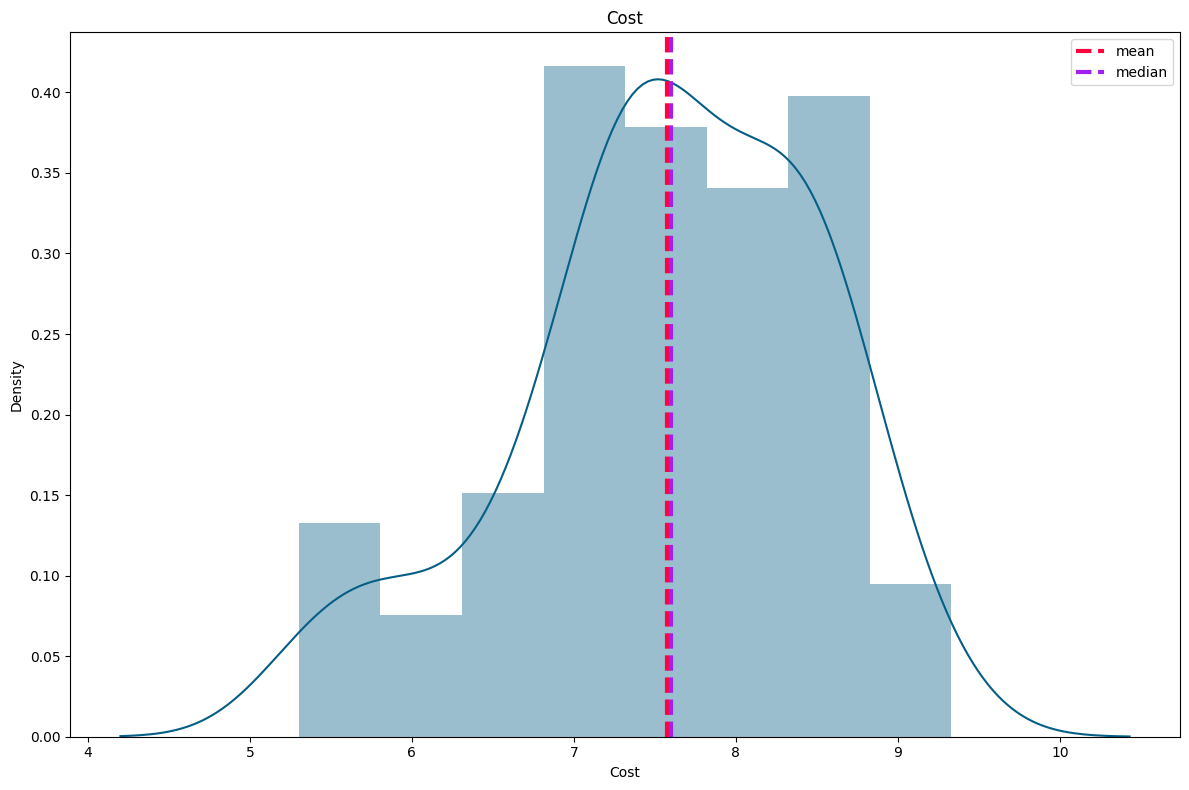

In [ ]:
# visualization of log transformation of cost
sns.distplot(cluster_df['Cost'], color = '#055E85')
plt.axvline(cluster_df['Cost'].mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(cluster_df['Cost'].median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.title('Cost');
plt.tight_layout();

In [ ]:
# Checking for skewness of cost again
features = ['Cost']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Cost']
Skew symmetric features : []


So now there is no skewness in cost. Hence we can proceed further.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Min max scaler for only numeric columns

In [ ]:
scaled_df = cluster_df.copy()
scaled_df[["Cost","No_of_cuisine"]] = scaler.fit_transform(cluster_df[["Cost","No_of_cuisine"]])
scaled_df.set_index("Restaurant_name", inplace= True)

In [ ]:
# Applying minmax transformation to numeric data
numeric_cols = list(cluster_df.describe().columns)
scaled_df = pd.DataFrame(scaler.fit_transform(cluster_df[numeric_cols]))
scaled_df.columns = numeric_cols

In [ ]:
scaled_df

Cost  No_of_cuisine  Cuisines_American  Cuisines_Andhra  \
0    0.831098       0.228571                0.0              0.0   
1    0.200790       0.000000                0.0              0.0   
2    0.695339       0.228571                0.0              0.0   
3    0.772378       0.228571                0.0              0.0   
4    0.600219       0.228571                1.0              0.0   
5    0.727091       0.685714                0.0              0.0   
6    0.616247       0.428571                1.0              0.0   
7    0.100327       0.085714                0.0              0.0   
8    0.499535       0.228571                0.0              0.0   
9    0.515559       0.000000                0.0              0.0   
10   0.671667       0.428571                0.0              0.0   
11   0.000000       0.000000                0.0              0.0   
12   0.515559       0.000000                1.0              0.0   
13   0.709954       0.685714                0.0              1.0   
14   0.859872       0.428571                0.0              0.0   
15   0.444136       0.085714                0.0              0.0   
16   0.372729       0.085714                0.0              0.0   
17   0.788409       1.000000                0.0              0.0   
18   0.499535       0.228571                0.0              0.0   
19   0.482405       0.085714                0.0              0.0   
20   0.889131       0.428571                0.0              0.0   
21   0.570969       0.085714                0.0              0.0   
22   0.544806       0.085714                0.0              0.0   
23   1.000000       0.685714                0.0              0.0   
24   0.310368       0.085714                0.0              0.0   
25   0.444136       0.085714                0.0              0.0   
26   0.583085       0.228571                0.0              0.0   
27   0.343500       0.085714                0.0              0.0   
28   0.631303       0.228571                0.0              0.0   
29   0.716951       0.228571                0.0              0.0   
30   0.343500       0.085714                0.0              0.0   
31   0.544806       0.228571                0.0              0.0   
32   0.650056       0.685714                0.0              0.0   
33   0.736833       0.228571                0.0              0.0   
34   0.544806       0.228571                0.0              0.0   
35   0.944565       0.428571                0.0              0.0   
36   0.808292       0.428571                0.0              0.0   
37   0.788409       0.428571                0.0              0.0   
38   0.398879       0.085714                1.0              0.0   
39   0.515559       0.085714                0.0              0.0   
40   0.583085       0.228571                0.0              0.0   
41   0.499535       0.228571                0.0              0.0   
42   0.343500       0.085714                0.0              0.0   
43   0.000000       0.000000                0.0              0.0   
44   0.444136       0.085714                0.0              0.0   
45   0.544806       0.228571                0.0              0.0   
46   0.798550       0.685714                1.0              0.0   
47   0.444136       0.085714                0.0              0.0   
48   0.957997       0.685714                0.0              0.0   
49   0.398879       0.085714                0.0              0.0   
50   0.272128       0.228571                0.0              0.0   
51   0.499535       0.228571                0.0              0.0   
52   0.544806       0.228571                0.0              0.0   
53   0.594638       0.085714                0.0              0.0   
54   0.843840       0.428571                0.0              0.0   
55   0.570969       0.428571                0.0              1.0   
56   0.743121       0.428571                0.0              0.0   
57   0.570969       0.085714                0.0              0.0 

##### Which method have you used to scale you data and why?

Since the dummy variables created from cuisines contain the value 0 and 1 while other variables have different range of values, we used MinMax Scaler to scale the data. This feature scaling prevents the models from getting biased toward a specific range of values.

### 7. Dimesionality Reduction (For clustering)

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca

features = scaled_df.columns

# create an instance of PCA
from sklearn.decomposition import PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df)

PCA()

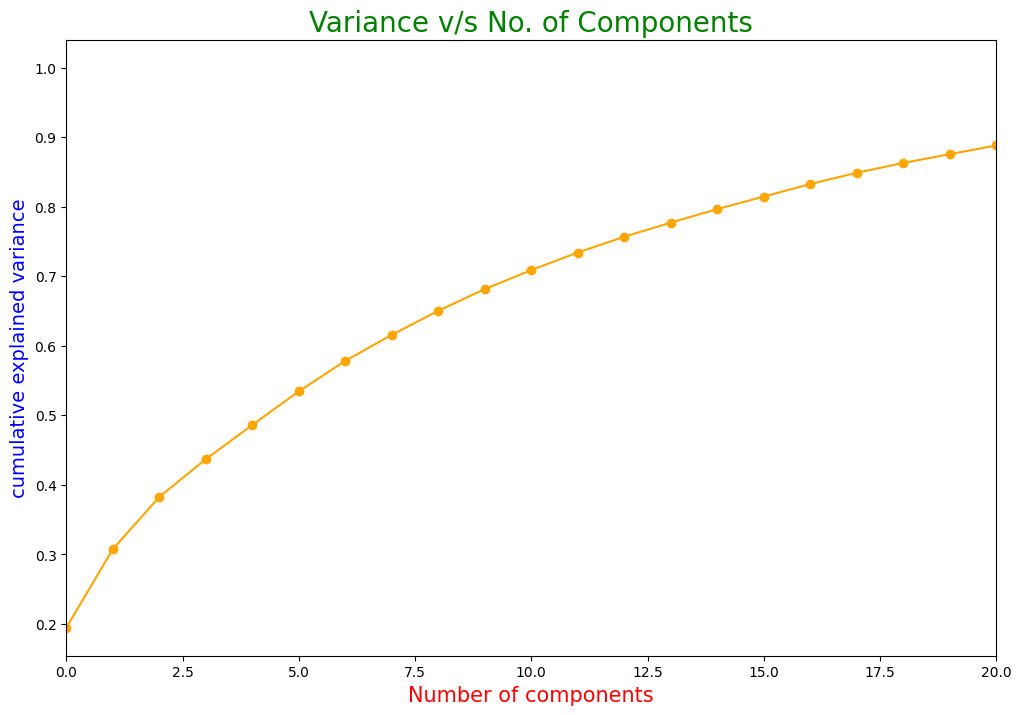

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('Number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 20])
plt.show()

In [ ]:
#using n_component as 4
pca = PCA(n_components=4)

# fit PCA on features
pca.fit(scaled_df)

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 4 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df)

Explained variation per principal component: [0.19454174 0.11290422 0.07516374 0.05430964]
Cumulative variance explained by 4 principal components: 43.69%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (105, 46)
transformed shape: (105, 4)


##### Do you think that dimensionality reduction is needed? Explain Why?

There are more than 30 variables for a clustering dataset, or 47 variables, and more feaures increase the computational cost of cluster algorithms. Additionally, the "curse of dimensionality," in which the data becomes sparse and the clusters are more difficult to identify, can result from high dimensions.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Because PCA( Principal Component Analysis) is a widely used dimensionality reduction technique that can find the patterns in the data that cause the most variation, we have used it as such. While maintaining trends and patterns, primary component analysis( PCA) reduces the complexity of high-dimensional data. This is accomplished by condensing the data into smaller dimensions that serve as feature summaries.

### 8. Data Splitting (for sentimental analysis)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
#X = X_tfidf
y = sentiment_df['Sentiment']

In [ ]:
y.value_counts()

1    6321
0    3678
Name: Sentiment, dtype: int64

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (7499, 17305)
y_train  (7499,)
X_test  (2500, 17305)
y_test  (2500,)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

##### What data splitting ratio have you used and why?

we have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

<Axes: ylabel='Sentiment'>

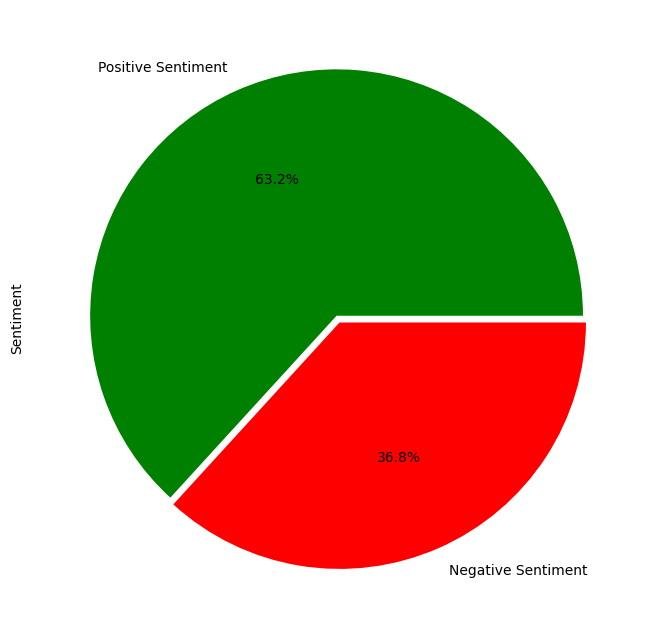

In [ ]:
# check if dataset is imbalanced or not
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['green','red'],
                               explode=[0.01,0.02])

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced but since it is lightly imbalanced, hence handling is not neccesaary. So we can proceed with same dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#not needed

## ***7. ML Model Implementation***

### ML Model - 1 : CLUSTERING


```
K Means clustering
```

In [ ]:
df_pca_copy = df_pca.copy()

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
wcss_list= []  #Initializing the list for the values of WCSS
wcss_dict = {}
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df_pca)
    wcss_list.append(kmeans.inertia_)
    wcss_dict[i] = kmeans.inertia_

In [ ]:
wcss_dict

{1: 109.63930004994627,
 2: 71.4368704678012,
 3: 52.75084151988398,
 4: 39.080465055230704,
 5: 27.778334377189214,
 6: 23.70136851266914,
 7: 20.831783737411826,
 8: 18.400353701242835,
 9: 16.260666234460526,
 10: 14.199301365055256}

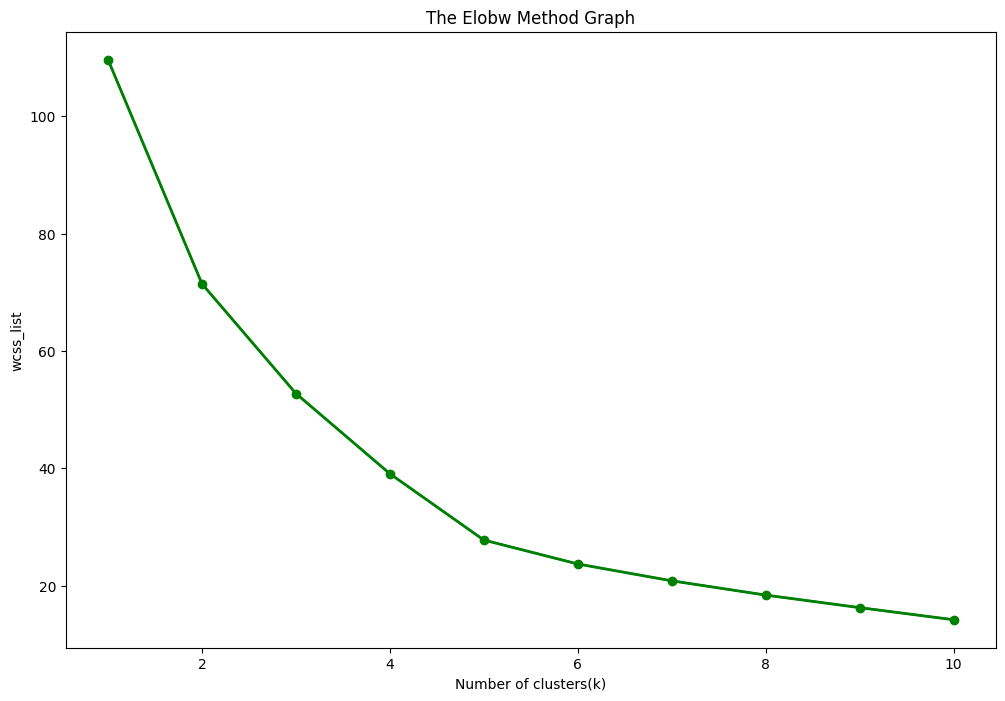

In [ ]:
# plot for sum of squared distance for each number of cluster
plt.plot(range(1, 11), wcss_list)
plt.plot(range(1,11),wcss_list, linewidth=2, color="green", marker ="o")
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

###Fitting the model with hyperparameter tuning

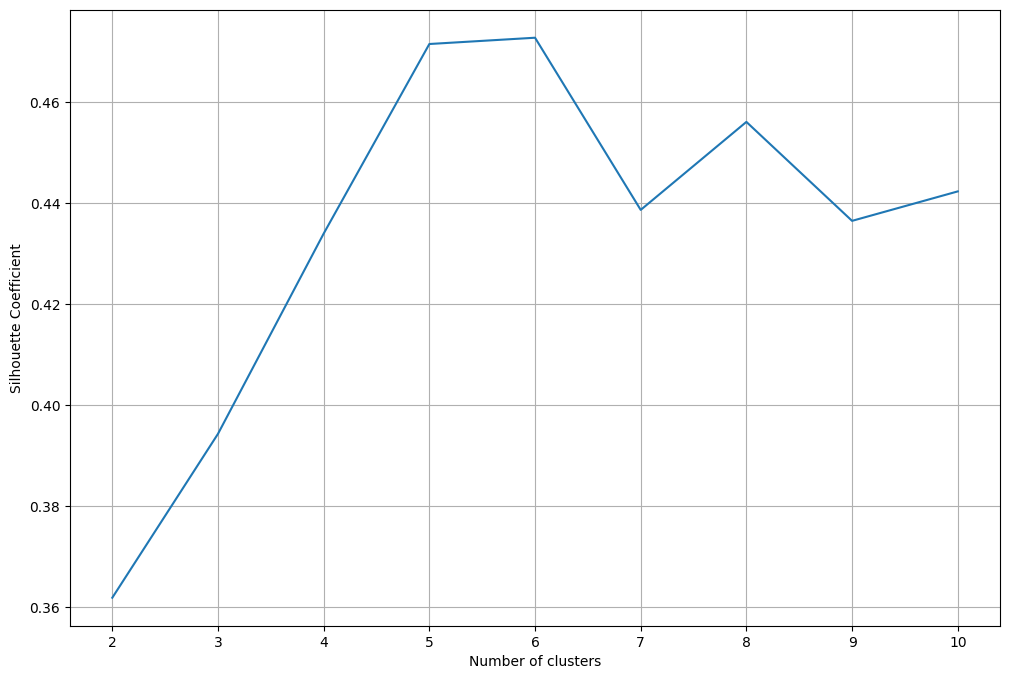

In [ ]:
# silhoutte score to find optimal number of scores
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,11):
  km = KMeans(n_clusters=k, random_state=3)
  km.fit(df_pca)
  silhouette_avg.append(silhouette_score(df_pca, km.labels_))

# plot the results
plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Here it is clearly visible that Silhouette cofficient is minimum for k=4. Hence optimal number od clusters must be 4.

For n_clusters = 2 The average silhouette_score is : 0.36186963675646516
For n_clusters = 3 The average silhouette_score is : 0.3876311417473593
For n_clusters = 4 The average silhouette_score is : 0.4205169012374313
For n_clusters = 5 The average silhouette_score is : 0.46773119014145353
For n_clusters = 6 The average silhouette_score is : 0.472757613091614


'  for i, c in enumerate(centers):\n      ax2.scatter(c[0], c[1], marker=\'\' %i, alpha=1,\n                    s=50, edgecolor=\'k\')\n\n    ax2.set_title("The visualization of the clustered data.")\n    ax2.set_xlabel("Feature space for the 1st feature")\n    ax2.set_ylabel("Feature space for the 2nd feature")\n    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "\n                  "with n_clusters = %d" % n_clusters),\n                 fontsize=14, fontweight=\'bold\')\n'

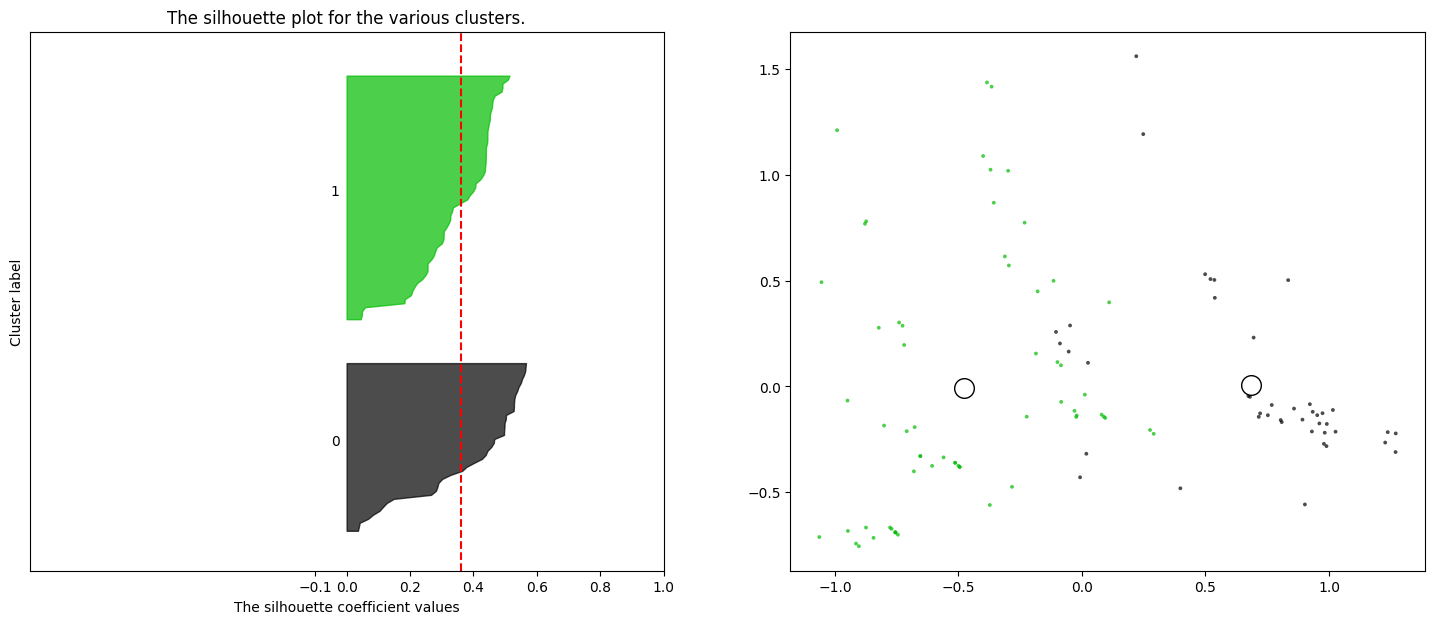

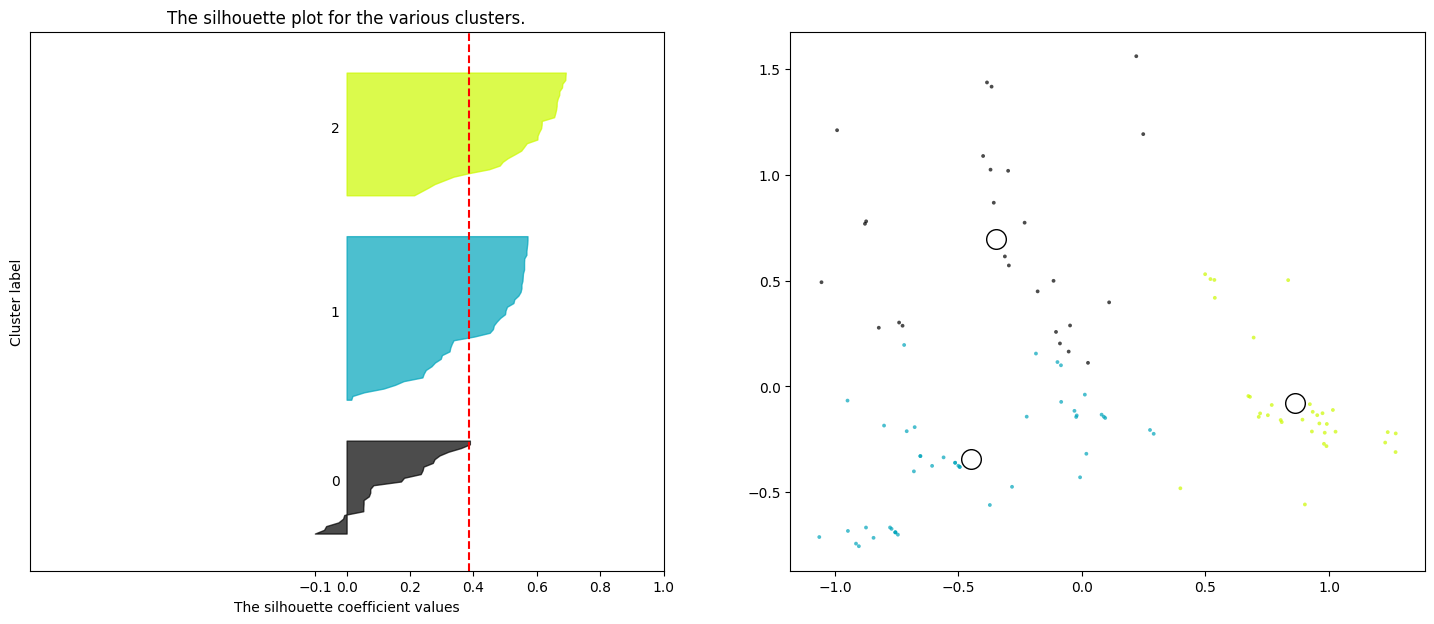

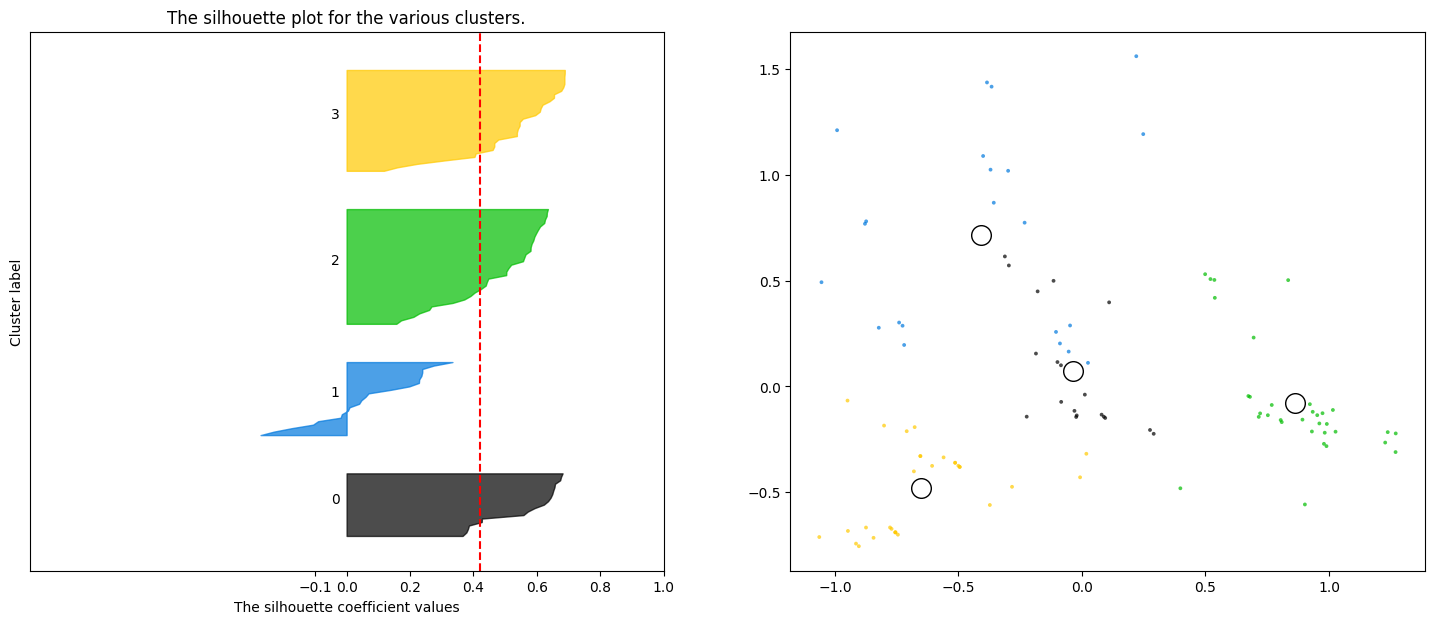

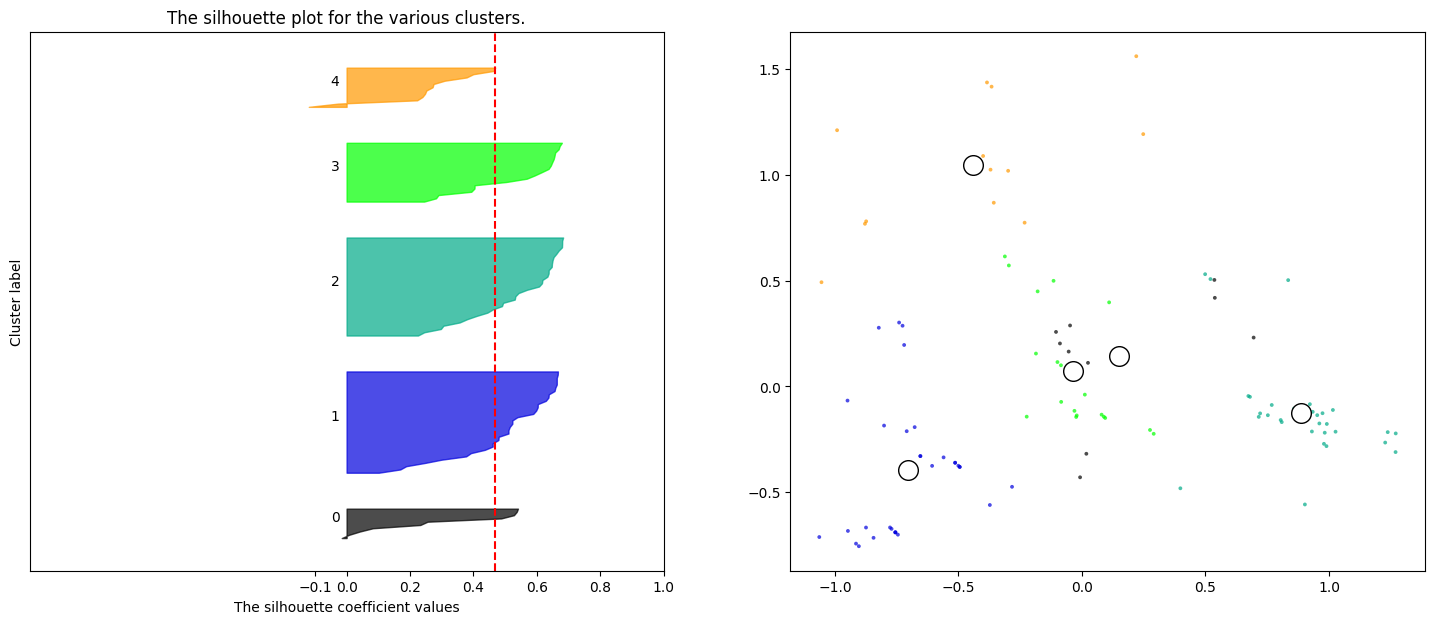

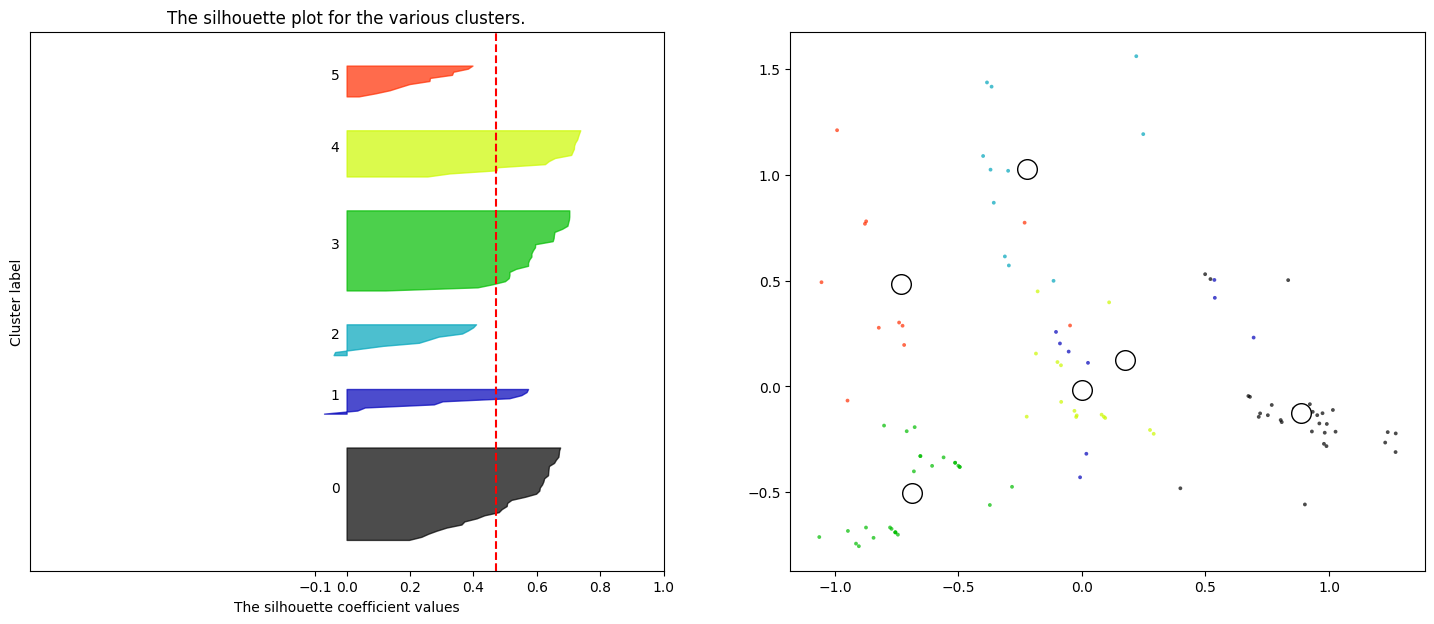

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
#visualizing Silhouette Score for individual clusters and the clusters made
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower =  y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

'''  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='' %i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
'''

In [ ]:
#fitting on 4 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 10)
y_predict= kmeans.fit_predict(df_pca)

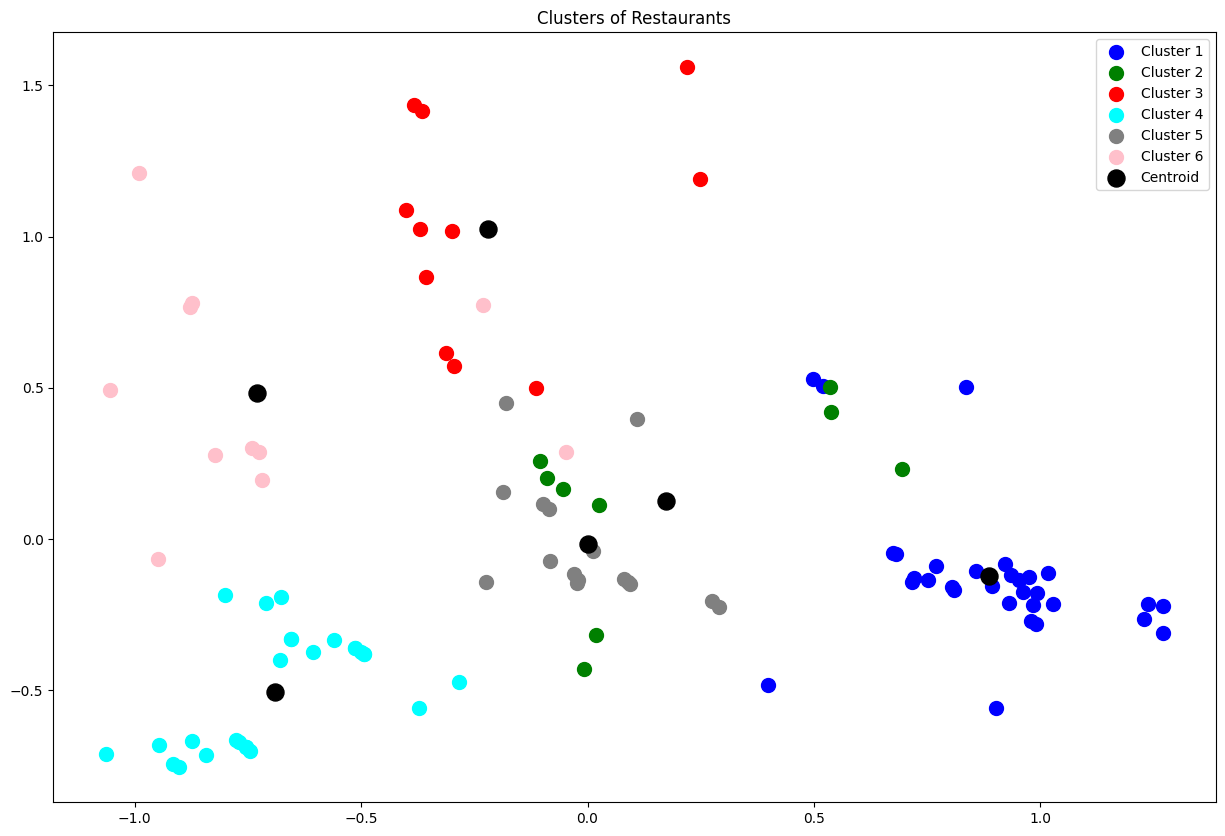

In [ ]:
#visulaizing the clusters
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0, 0], df_pca[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(df_pca[y_predict == 1, 0], df_pca[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(df_pca[y_predict== 2, 0], df_pca[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(df_pca[y_predict == 3, 0], df_pca[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(df_pca[y_predict == 4, 0], df_pca[y_predict == 4, 1], s = 100, c = 'grey', label = 'Cluster 5') #for first cluster
plt.scatter(df_pca[y_predict == 5, 0], df_pca[y_predict == 5, 1], s = 100, c = 'pink', label = 'Cluster 6') #for second cluster
'''plt.scatter(df_pca[y_predict== 6, 0], df_pca[y_predict == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7') #for third cluster
plt.scatter(df_pca[y_predict == 7, 0], df_pca[y_predict == 7, 1], s = 100, c = 'orange', label = 'Cluster 8') #for fourth cluster

'''
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroid')
plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

In [ ]:
# Assigning clusters to our data
new_df_cluster = cluster_df.copy()
cluster_df['clusters'] = y_predict
# checking how it is working
cluster_df.head()

Restaurant_name      Cost  No_of_cuisine  Cuisines_American  \
0               10 Downing Street  8.648397              9                  0   
1                        13 Dhaba  6.111467              1                  0   
2  3B's - Buddies, Bar & Barbecue  8.101981              9                  0   
3       AB's - Absolute Barbecues  8.412055              9                  0   
4               Absolute Sizzlers  7.719130              9                  1   

   Cuisines_Andhra  Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  \
0                0                 0               0             0   
1                0                 0               0             0   
2                0                 0               0             0   
3                0                 0               0             0   
4                0                 0               0             0   

   Cuisines_Bakery  Cuisines_Beverages  ...  Cuisines_Pizza  Cuisines_Salad  \
0                0                   0  ...               0               0   
1                0                   0  ...               0               0   
2                0                   0  ...               0               0   
3                0                   0  ...               0               0   
4                0                   0  ...               0               0   

   Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
0                 0                      0                 0   
1                 0                      0                 0   
2                 0                      0                 0   
3                 0                      0                 0   
4                 0                      0                 0   

   Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  Cuisines_Wraps  \
0                     0               0              0               0   
1                     0               0              0               0   
2                     0               0              0               0   
3                     0               0              0               0   
4                     0               0              0               0   

   clusters  
0         5  
1         4  
2         4  
3         4  
4         5  

[5 rows x 48 columns]

In [ ]:
# let's find the count of each of 4 clusters
cluster_df['clusters'].value_counts()

0    31
3    27
4    16
5    11
2    11
1     9
Name: clusters, dtype: int64

In [ ]:
#creating new df for checkign cuisine in each cluster
new_cluster_df = hotel_df.copy()
new_cluster_df['clusters'] = y_predict
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant_name  Cost       Cuisines  \
14  AB's - Absolute Barbecues  1500  Mediterranean   
80        Tandoori Food Works   500          Kebab   
79               Olive Garden   700    Continental   
12          Absolute Sizzlers   750       American   
87        American Wild Wings   600          Salad   

                                              Timings  No_of_cuisine  clusters  
14            12 Noon to 4:30 PM, 6:30 PM to 11:30 PM              3         4  
80  12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...              3         1  
79                  12 Noon to 3:30 PM, 7 PM to 11 PM              4         0  
12                                   11:30 AM to 1 AM              3         0  
87                                    12 Noon to 4 AM              4         0

In [ ]:
new_cluster_df.shape

(313, 6)

In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['clusters'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["clusters"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 5 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Ice Cream' 'Desserts' 'Fast Food' 'Momos'
 'Japanese' 'Sushi' 'Mughlai' 'Biryani' 'Bakery' 'Seafood' 'Hyderabadi'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Seafood' 'Beverages' 'European' 'American' 'Fast Food' 'South Indian'
 'Andhra' 'Continental' 'Italian' 'Mughlai' 'Salad' 'Momos' 'Hyderabadi'
 'Bakery' 'Mithai'] 

Cuisine List for Cluster : 3 

['Seafood' 'Goan' 'North Indian' 'Continental' 'Asian' 'American'
 'Chinese' 'Kebab' 'South Indian' 'Street Food' 'Fast Food' 'Italian'
 'Finger Food' 'Mediterranean' 'European' 'Spanish' 'Bakery' 'Desserts'
 'Cafe' 'Andhra' 'Modern Indian' 'Beverages' 'Hyderabadi' 'BBQ' 'Thai'
 'Sushi' 'Momos' 'Mughlai' 'Biryani'] 

Cuisine List for Cluster : 0 

['Healthy Food' 'North Indian' 'Continental' 'South Indian' 'Lebanese'
 'Ice Cream' 'Desserts' 'Americ

In [ ]:
import plotly.express as px

In [ ]:
# clusters with cost
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
# clusters with no of cuisines
fig = px.scatter(cluster_df, y="No_of_cuisine", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is a type of Unsupervised Learning algorithm. It falls into the category of centroid-based algorithms, where each cluster is connected to a centroid. The primary objective of this algorithm is to minimize the total distance between data points and their respective clusters. It takes an unlabeled dataset as input, divides the dataset into a predetermined number of clusters (k), and repeats the process until the optimal clusters are found. Two methods can be employed to determine the value of k: 1) ELBOW METHOD This method utilizes the concept of WCSS (Within Cluster Sum of Squares), which quantifies the total variations within a cluster. 2) SILHOUETTE METHOD The silhouette coefficient, or silhouette score, is a measure of how similar a data point is within its cluster (cohesion) compared to other clusters (separation).

#### 2. Explain the business impact of the ML model used.

K-means clustering is a valuable tool for segmenting customers based on various types of data, including demographic, psychographic, behavioral, and performance data. By clustering consumers within a specific product category, businesses can effectively develop strategies tailored to different customer segments and improve customer retention for long-term business growth.

### ML Model - 2 : DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

#fitting on model
model = dbscan.fit(df_pca)

#find out the labels
labels = model.labels_


In [ ]:
#calculating no of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

5

In [ ]:
#find the silhoutte score
from sklearn import metrics
print(metrics.silhouette_score(df_pca,labels))

0.38991155348316553


In [ ]:
# predict thr clusters or labels and append in cluster df
yhat = model.fit_predict(df_pca)
cluster_df["Label_DBscan"] = yhat
cluster_df['Label_DBscan'].unique()

array([ 0,  1, -1,  2,  3,  4])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN is an acronym for Density-Based Spatial Clustering of Applications with Noise. It forms a single cluster by grouping data points that are closely packed together. By examining the local density of the data points, DBSCAN can detect clusters in extensive spatial datasets. The standout characteristic of DBSCAN clustering is its ability to handle outliers effectively. Unlike K-Means, which necessitates specifying the number of centroids in advance, DBSCAN does not require this information.

### ML Model - 4 : Sentimental Analysis

Since we get a lot of reviews from the customers, it would be necesary to determine the sentiments of these reviews. We would be consider to build a supervised machine learning model to achieve the objective of determining the sentiments.

In [ ]:
#Importing all the required libraries for sentiment analysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
# List of models
models = [["LogisticRegression", LogisticRegression(fit_intercept = True, class_weight='balanced')], ["DecisionTree", DecisionTreeClassifier()],
          ["RandomForest",RandomForestClassifier()],["XGBoost", XGBClassifier()],
          ["KNN", KNeighborsClassifier()]]

In [ ]:
#function for fitting the model and calculating scores

def model_build(models,X_train,X_test,y_train,y_test):
  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  X_train, X_test, y_train and y_test as pandas dataframe or numpy ndarray
  models: A list with model name and the model class.
  """
  score_matrix = pd.DataFrame()
  # dictionary for roc curve
  roc_sc = {}

  for model_name,model in models:
    current_result = dict()

    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    ypredProb = model.predict_proba(X_test)

    # Model metrics
    current_result["Model"] = model_name

    #Accuracy
    current_result["Train Accuracy"] = accuracy_score(y_train,y_pred_train)
    current_result["Test Accuracy"] = accuracy_score(y_test,y_pred_test)

    #Precision
    current_result["Test Precision"] = precision_score(y_test,y_pred_test)

    # Recall
    current_result["Test Recall"] = recall_score(y_test, y_pred_test)

    #f1 score
    current_result["Test F1"] = f1_score(y_test, y_pred_test)

    #AUC_ROC curve
    current_result["Test ROC_AUC Score"] = roc_auc_score(y_test,y_pred_test)
    current_result = pd.DataFrame(current_result,index=[1])

    #appending in score_matrix
    score_matrix = score_matrix.append(current_result)

    # ROC roc_curve values
    fpr, tpr, threshold = roc_curve(y_test, ypredProb[:,1])

    roc_sc[model_name] = (fpr,tpr)

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  roc_sc["TPR = FPR"] = (p_fpr, p_tpr)
  return score_matrix , roc_sc

In [ ]:
# Obtaining results
model_results, Curve = model_build(models,X_train,X_test,y_train,y_test)

In [ ]:
model_results

Model  Train Accuracy  Test Accuracy  Test Precision  \
1  LogisticRegression        0.913855         0.8736        0.914361   
1        DecisionTree        0.991999         0.7872        0.826441   
1        RandomForest        0.991999         0.8684        0.855106   
1             XGBoost        0.939725         0.8704        0.884379   
1                 KNN        0.663022         0.6468        0.642474   

   Test Recall   Test F1  Test ROC_AUC Score  
1     0.881830  0.897801            0.870720  
1     0.837992  0.832177            0.769428  
1     0.952351  0.901112            0.839026  
1     0.913596  0.898750            0.855286  
1     0.989835  0.779195            0.526775

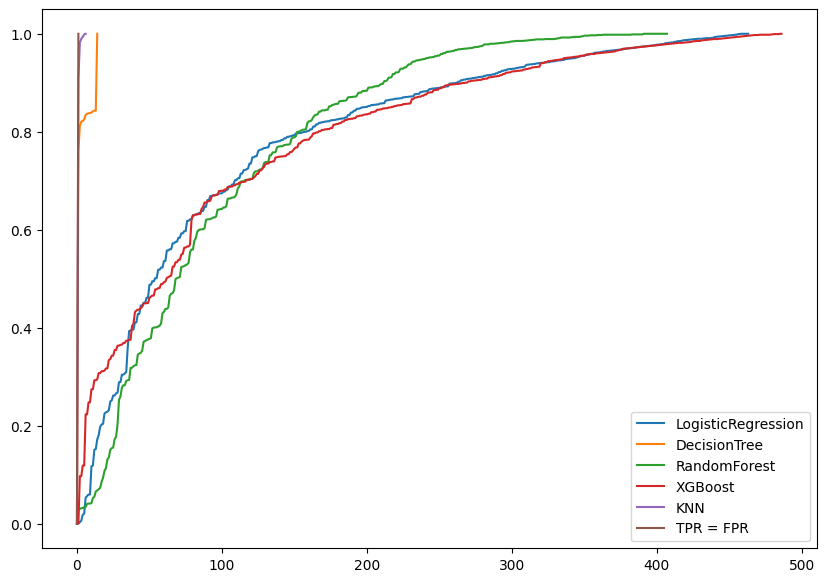

In [ ]:
# ROC_AUC curve
plt.figure(figsize = (10,7))
for model , value in Curve.items():
  sns.lineplot(value[1], label = model)

Based on the metrics and ROC-AUC curve presented above, we can conclude that logistic regression is the most suitable model for this dataset. Following closely behind are the XGBoost model and Random Forest. Conversely, KNN performs the poorest among all models for this dataset. To further refine the logistic regression model, we will conduct hyperparameter tuning to obtain the final model for this dataset.

2. Hyperparameter tuning

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

A) Logistic Regression

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    }
]

In [ ]:
grid_lr = GridSearchCV( LogisticRegression(fit_intercept = True, class_weight='balanced'), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = grid_lr.fit(X_train,y_train)

# Get the results
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.8530466053087902
LogisticRegression(class_weight='balanced')
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
final_model = LogisticRegression(random_state=42, solver='lbfgs', penalty= 'l2', C = 10 )
final_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [ ]:
# prediction report
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8637    0.7937    0.8272       926
           1     0.8842    0.9263    0.9047      1574

    accuracy                         0.8772      2500
   macro avg     0.8739    0.8600    0.8660      2500
weighted avg     0.8766    0.8772    0.8760      2500



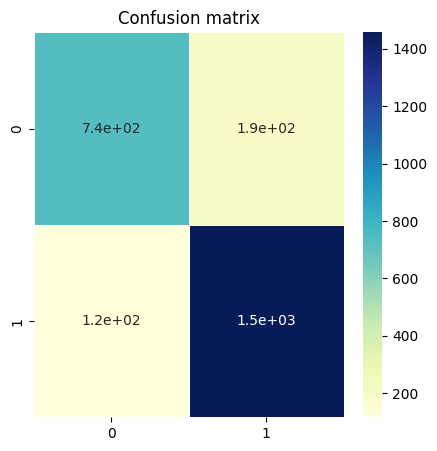

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of C.I got best params 'C': 10. I have also used Cross validation with CV = 3.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 85.09% || Accuracy After: 86.00%

Precision Before: 90.54% || Precision After:85.89 %

Recall Before: 85.28% || Recall After: 86.00%

F1 Score Before: 87.84%|| F1 Score After: 85.89%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics utilized for sentiment analysis encompass precision, recall, F1-score, and accuracy. Precision assesses the ratio of accurate positive predictions to all positive predictions. This metric proves advantageous when the consequences of false positives are significant. Recall (also known as sensitivity or true positive rate) gauges the ratio of accurate positive predictions to all actual positive instances. It is a valuable metric when the repercussions of false negatives are substantial. F1-score is the harmonic mean of precision and recall and serves as a comprehensive measure of a classifier's effectiveness. Accuracy denotes the ratio of correctly classified instances to all instances. The choice of evaluation metric hinges on the specific use case and the respective costs associated with false positives and false negatives. To achieve positive business impact, the F1-score can be considered as it strikes a balance between precision and recall, providing an overall performance measurement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The logistic regression model was selected for the final prediction due to its highest auc_roc score compared to other models.

## ***8. Conclusion***

A dataset of customer reviews for the food delivery service Zomato was used for clustering and sentiment analysis. Understanding the customer's experience and learning more about their feedback were the goals of this analysis.

#*CONCLUSION FROM CLUSTERING:*

Given the dataset of restaurants, cuisines, prices, and ratings, I created 6 clusters using KMeans clustering, Agglomerative Hierarchial Clustering and DBSCAN.

#*SENTIMENT ANALYSIS CONCLUSION*

I have used a variety of supervised models, including logistic regression, decision trees, random forests, XGBoost, and KNN, to analyze sentiment. As a result, I used logistic regression to make my final Sentiment Analysis prediction, which was accurate at 86% and had an F1 score of 85% after hyperparameter tuning.


#*EDA'S CONCLUSION*

The average cost per person in restaurants ranges from less than 500 to over 250. However, there aren't enough restaurants with prices higher than 2000.

Expensive Restaurants: The most expensive restaurant in this area is Collage-Hyatt Hyderabad Gachibowli, which costs rupees 2800, followed by the "Feast-Sheraton Hyderabad Hotel," which is cost-effective at Rs. 2500. The graph and table show other pricey restaurants.

Cheap Restaurants: Here, "Mohammedia Shawarma" and "Amul" are the cheapest restaurants where we can order the dish for as little as 150 rupees, followed by "Sweet Basket,"" KS Bakers," and other restaurants with prices as low as 200.

The most popular cuisine in restaurants is North Indian, followed by Chinese and Continental food.
